# WHICH IS THE BEST NEIGHBORHOOD TO OPEN A CROSSFIT GYM IN NEW YORK CITY?

The objective of this project is to analyze and select the best neighborrhod in the New York City to open a new Crossfit Gym. Using data science methodology, this project aims to provide best possible locations can be chosen by stakeholders.  Since there are many Crossfit Gyms in New York City, I will try to detect locations that are not already crowded with Crossfit Gyms at all.

The City of New York is the most populous city in the United States and also the most densely populated major city in the United States. The New York metropolitan area is estimated to produce a gross metropolitan product (GMP) of US$1.9 trillion. If greater New York City were a sovereign state, it would have the 12th highest GDP in the world. New York is home to the highest number of billionaires of any city in the world.

CrossFit is a lifestyle characterized by safe, effective exercise and sound nutrition. CrossFit can be used to accomplish any goal, from improved health to weight loss to better performance. The program works for everyone—people who are just starting out and people who have trained for years. The magic is in the movements. Workouts are different every day and modified to help each athlete achieve his or her goals. CrossFit workouts can be adapted for people at any age and level of fitness. Off the carbs, off the couch. The CrossFit lifestyle—a combination of diet and exercise—is the key to fitness and long-term health.

## DATA ACQUISITION

1)The number of CrossFit gyms in New York City, distributed by boroughs and neighborhoods.  
2)Coordinates of the centers of the boroughs, the neighborhoods, and New York City.   
3)Venues data, directly related to CrossFit gyms with coordinates, whit the distance of the centers of boroughs and neighborhoods.  
4)New York City statistical data on density, per capita income, area and other important data.  
5)Other data obtained on the Internet, like Wikipedia and Officials Government data.  

### Methods to extract them:

The coodinates will be obtained using Geopy. Foursquare API will provide many the venues data.
This is a project that will make use of many data science skills such as working with API (Foursquare), data cleaning, data wrangling, to machine learning and map visualization (Folium).

### Basically:

Basically:   
1) Getting Officials Data about Boroughs and Neighborhoods of NYC.  
2) Using the Foursquare API to search about “CrossFit” in NYC.  
&nbsp;&nbsp;&nbsp;&nbsp;a) Only venues with “CrossFit” in the name (Officials CrossFit Gyms have this authorization!)   
&nbsp;&nbsp;&nbsp;&nbsp;b) Deleting duplicates and different Cities, according as criterions stablished.  
&nbsp;&nbsp;&nbsp;&nbsp;c) Obtaining two files: Neighboorhods/Boroughs with and without CrossFits gyms.  
3) Getting Statistical Data about NYC, like Population, Density, Area, Per Capita and etc.  
&nbsp;&nbsp;&nbsp;&nbsp;a) Creating a file with all Statistics Data about Boroughs and quantities of CrossFit gyms.  
&nbsp;&nbsp;&nbsp;&nbsp;b) Normalizing these data to compare and to obtain the score of each Borough.  
4) After choosing the Borough, analyze the Neighborhoods, using the same techniques availables.  
5) Creating a lot of MAPs and Plotting Statisticals Graphics to illustrate the analysis.  

## INSTALLING NECESSARY LIBRARIES AND IMPORTING THINGS

In [2]:
#INSTALLING

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!conda install -c conda-forge geopy

print('Installed!')

Solving environment: ...working... done

# All requested packages already installed.

Installed!


In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from folium.features import DivIcon

print('Libraries imported.')

Libraries imported.


In [5]:
#IMPORTING THINGS

import urllib.request
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt



# INSTALLING THINGS

!pip install beautifulsoup4
!pip install lxml
print('\nYou have installed your things2!')


You have installed your things2!


## GETTING ALL THE NEIGHBORHOODS / ZONE OF THE NEW YORK CITY OFFICIAL WEBSITE

In [16]:
# OFFICIAL SITE OF NEW YORK CITY
url = "https://data.cityofnewyork.us/api/views/xyye-rtrs/rows.json?accessType=DOWNLOAD"
newyork_data2 = requests.get(url).json()
#newyork_data2

In [17]:
nyb = pd.DataFrame(newyork_data2['data'])

In [18]:
#nyb.shape

In [19]:
nyb.head(2)

0                                     1   2           3   \
0  row-7q9n-adg4_xvee  00000000-0000-0000-BC1E-0359B8CD43D9   0  1450726363   
1  row-s456-uyfi_n9s7  00000000-0000-0000-20BE-C45ADF984BA3   0  1450726363   

     4           5     6    7                                             8   \
0  None  1450726363  None  { }   POINT (-73.8472005205491 40.89470517661004)   
1  None  1450726363  None  { }  POINT (-73.82993910812405 40.87429419303015)   

  9           10 11         12    13 14   15     16  
0  1   Wakefield  1  Wakefield           0.0  Bronx  
1  2  Co-op City  2      Co-op  City     0.0  Bronx

In [20]:
#nyb[16].unique()

In [21]:
nyb2 = nyb[[8,9,10,16]]

In [22]:
nyb2.columns = ['coordenadas','numero','neighborhood','borough']

In [23]:
nyb2.head(2)

coordenadas numero neighborhood borough
0   POINT (-73.8472005205491 40.89470517661004)      1    Wakefield   Bronx
1  POINT (-73.82993910812405 40.87429419303015)      2   Co-op City   Bronx

In [24]:
#nyb2.shape

In [26]:
#lista = ("(","POINT",")")
nyb2['coordenadas'] = nyb2['coordenadas'].str.replace("(","").str.replace(")","").str.replace("POINT ","")

C:\Users\Eduardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
nyb2.head(2)

coordenadas numero neighborhood borough
0   -73.8472005205491 40.89470517661004      1    Wakefield   Bronx
1  -73.82993910812405 40.87429419303015      2   Co-op City   Bronx

In [28]:
nyb2['long'] = nyb2.coordenadas.str.split(" ", n = 1, expand = True)[0]
nyb2['lat'] = nyb2.coordenadas.str.split(" ", n = 1, expand = True)[1]

C:\Users\Eduardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Eduardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
nyb2.head(2)

coordenadas numero neighborhood borough  \
0   -73.8472005205491 40.89470517661004      1    Wakefield   Bronx   
1  -73.82993910812405 40.87429419303015      2   Co-op City   Bronx   

                 long                lat  
0   -73.8472005205491  40.89470517661004  
1  -73.82993910812405  40.87429419303015

In [30]:
neighborhoods_all = nyb2[['borough','neighborhood','lat','long']]

In [31]:
neighborhoods_all.columns =['Borough','Neighborhood','Latitude','Longitude']

In [32]:
neighborhoods_all.head()

Borough Neighborhood            Latitude           Longitude
0   Bronx    Wakefield   40.89470517661004   -73.8472005205491
1   Bronx   Co-op City   40.87429419303015  -73.82993910812405
2   Bronx  Eastchester   40.88755567735082  -73.82780644716419
3   Bronx    Fieldston  40.895437426903875  -73.90564259591689
4   Bronx    Riverdale   40.89083449389134  -73.91258546108577

In [33]:
neighborhoods_all[['Latitude', 'Longitude']] = neighborhoods_all[['Latitude', 'Longitude']].astype(float)

C:\Users\Eduardo\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [34]:
neighborhoods_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 4 columns):
Borough         299 non-null object
Neighborhood    299 non-null object
Latitude        299 non-null float64
Longitude       299 non-null float64
dtypes: float64(2), object(2)
memory usage: 9.4+ KB


In [35]:
neighborhoods_all.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

### SAVING THE FILE FOR FUTURE USE 

In [36]:
#gravando o arquivo para futuro uso, a fim de minumizar o uso do foursquare
#neighborhoods_all.to_csv('neighborhoods_all.csv')

In [54]:
#reading
neighborhoods_all = pd.read_csv('neighborhoods_all.csv')
neighborhoods_all = neighborhoods_all.drop('Unnamed: 0', axis=1)
neighborhoods_all.head(2)

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939

In [55]:
neighborhoods_all.shape

(299, 4)

## CREATING BOROUGHS FILE AND OBTAINING GEOGRAPHICAL COORDINATES

In [56]:
# pegando as coordenadas dos Boroughs para futuro uso
Boroughs = neighborhoods_all.Borough.unique()


In [57]:
Boroughs

array(['Bronx', 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

In [66]:
Boroughs_latlong = pd.DataFrame(columns=['Borough','Latitude','Longitude'])

for borou in Boroughs:
    
    address = borou+',New York City, NY'
    
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    Boroughs_latlong = Boroughs_latlong.append({'Borough': borou,
                                         'Latitude': latitude,
                                         'Longitude': longitude}, ignore_index=True)
    print('The geograpical coordinate of {} in New York City are {}, {}.'.format(borou, latitude, longitude))
    

The geograpical coordinate of Bronx in New York City are 40.85048545, -73.8404035580209.
The geograpical coordinate of Manhattan in New York City are 40.7896239, -73.9598939.
The geograpical coordinate of Brooklyn in New York City are 40.6501038, -73.9495823.
The geograpical coordinate of Queens in New York City are 40.6524927, -73.7914214158161.
The geograpical coordinate of Staten Island in New York City are 40.5834557, -74.1496048.


In [67]:
Boroughs_latlong

Borough   Latitude  Longitude
0          Bronx  40.850485 -73.840404
1      Manhattan  40.789624 -73.959894
2       Brooklyn  40.650104 -73.949582
3         Queens  40.652493 -73.791421
4  Staten Island  40.583456 -74.149605

### SAVING THE FILE FOR FUTURE USE (DO NOT USE UNNECESSARILY THE GEOLOCATOR)

In [58]:
#salvando para futuro uso
#Boroughs_latlong.to_csv('Boroughs_latlong.csv')

In [59]:
# reading
Boroughs_latlong = pd.read_csv('Boroughs_latlong.csv')
Boroughs_latlong = Boroughs_latlong.drop(columns=['Unnamed: 0'])
Boroughs_latlong

Borough   Latitude  Longitude
0          Bronx  40.850485 -73.840404
1      Manhattan  40.789624 -73.959894
2       Brooklyn  40.650104 -73.949582
3         Queens  40.652493 -73.791421
4  Staten Island  40.583456 -74.149605

## OBTAINING NEW YORK CITY GEOGRAPHICAL COORDINATES

In [32]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude_nyc = location.latitude
longitude_nyc = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude_nyc, longitude_nyc))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [37]:
cores = {'Bronx':'green', 'Manhattan':'red', 'Brooklyn':'indigo','Queens':'blue', 'Staten Island': 'orange'}

In [88]:
# CREATING A DATAFRAME
coordenadas = {'Lat': [latitude_nyc], 'Lng': [longitude_nyc]}
nyc_latlong = pd.DataFrame(coordenadas)
nyc_latlong

Lat        Lng
0  40.712728 -74.006015

### SAVING THE FILE FOR FUTURE USE (DO NOT USE UNNECESSARILY THE GEOLOCATOR)

In [60]:
#SAVIND THE FILE FOR FUTURE USE
#nyc_latlong.to_csv('nyc_latlong.csv')

# reading
nyc_latlong = pd.read_csv('nyc_latlong.csv')
nyc_latlong = nyc_latlong.drop(['Unnamed: 0'], axis=1)
nyc_latlong

Lat        Lng
0  40.712728 -74.006015

# SEARCHING THE CROSSFIT GYMS IN NEW YORK CITY

In [43]:
# MY CREDENTIALS FOURSQUARE

In [61]:
# MINHAS CREDENCIAIS

# @hidden_cell
# MY CREDENTIALS FOURSQUARE

CLIENT_ID = 'KHOOAL4SXWBLGHYZJABHLBXNQXEIICA2AD4PXM01FGQGVXVW' # your Foursquare ID
CLIENT_SECRET = 'K1UD4QW3B5WZKWNF2NIUVHKBUK1ANPQI2GS4LG1MJRT031AQ' # your Foursquare Secret
VERSION = '20180604'

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

In [62]:
neighborhoods_all.columns

Index(['Borough', 'Neighborhood', 'Latitude', 'Longitude'], dtype='object')

In [63]:
neighborhoods_all.shape

(299, 4)

### FUNCTION TO SEARCH ALL NYC NEIGHBORHOODS AT ONE TIME

In [49]:
# PESQUISA TODOS OS BAIRROS DE UMA VEZ - ARQUIVO ESTÁ INTERNO 

def getNearbyVenues_all(query, radius, limit):
    
    search_query = query
    search_radius = radius
    search_limit = limit
    
    nearby_venues = []
    nearby_erros = []
    venues_list = []
    erros_get_list = []
    
    count = 0
    count_erro_get = 0
    count_erro_append = 0
    count_erro_dataframe=0
    count_venues = 0
    
    #print('------- INICIO DA LEITURA DO ARQUIVO -------')
    #print(' ')
    
    # PARÂMETRO PARA A PESQUISA
    Neighborhoods_to_search = neighborhoods_all[:]
    
    for index, row in Neighborhoods_to_search[:].iterrows():
        count = count+1
        
        #try:
        #    if count%40 == 0 : input('Continua?')
        #except:
        #    return
    
        zone = row['Borough']
        name = row['Neighborhood']
        lat = row['Latitude']
        lng = row['Longitude']
    
    
    #for name, lat, lng in zip(names, latitudes, longitudes):
    #    count = count+1
    
        print(zone,', ', name,',  lat:', lat,' - Lng:', lng,' --> ',str(count))
                    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&query={},&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION,
            search_query,
            lat, 
            lng, 
            search_radius, 
            search_limit)
        
        try:
            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']
            #print(results[0]['venue']['name'])
            
        except:
            count_erro_get = count_erro_get+1
            erros_get_list.append([zone,name,lat,lng])
            print('------- Erro no GET URL JSON! -------')
        
        # return only relevant information for each nearby venue
        
    
        for v in results:
            
            count_venues = count_venues+1
            
            try:
                #try:
                #    print (name,
                #    #lat,
                #    #lng,
                #    v['venue']['name'], 
                #    v['venue']['location']['lat'], 
                #    v['venue']['location']['lng'],
                #    v['venue']['location']['address'],
                #    v['venue']['location']['distance'],
                #    v['venue']['location']['postalCode'],
                #    v['venue']['location']['city'],
                #    v['venue']['location']['state'],
                #    v['venue']['categories'][0]['name'])
                #except:
                #    pass

                try:
                    name_v = v['venue']['name'] 
                except:
                    name_v = np.nan
                    pass
                    
                try:
                    lat_v = v['venue']['location']['lat'] 
                except: 
                    lat_v = np.nan
                    pass
                    
                try:
                    lng_v= v['venue']['location']['lng']
                except: 
                    lng_v= np.nan
                    pass
                    
                try:
                    address_v= v['venue']['location']['address']
                except:
                    address_v= np.nan
                    pass
                    
                try:
                    distance_v = v['venue']['location']['distance']
                except:
                    distance_v = np.nan
                    pass
                
                try:
                    postalCode_v = v['venue']['location']['postalCode']
                except:
                    postalCode_v = np.nan
                    pass
                
                try:
                    city_v = v['venue']['location']['city']
                except: 
                    city_v = np.nan
                    pass
                    
                try:
                    state_v = v['venue']['location']['state']
                except:
                    state_v = np.nan
                    pass
                    
                try:
                    categoria_v = v['venue']['categories'][0]['name']
                except:
                    categoria_v = np.nan
                    pass
                    

                venues_list.append([
                zone,
                name,
                lat,
                lng,
                name_v, 
                lat_v,
                lng_v,
                address_v,
                distance_v,
                postalCode_v,
                city_v,
                state_v,
                categoria_v])
                
              
                #venues_list.append([
                #zone,
                #name,
                #lat,
                #lng,
                #v['venue']['name'], 
                #v['venue']['location']['lat'], 
                #v['venue']['location']['lng'],
                #v['venue']['location']['address'],
                #v['venue']['location']['distance'],
                #v['venue']['location']['postalCode'],
                #v['venue']['location']['city'],
                #v['venue']['location']['state'],
                #v['venue']['categories'][0]['name']])    
                
            except:
                count_erro_append = count_erro_append+1
                print('------- Erro no APPEND! -------')
                #pass
        
    try:
        #print('passando no pd...')
        
        #nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        
        nearby_venues = pd.DataFrame(venues_list)
        nearby_venues.columns = ['Borough','Neighborhood', 
                      'Neighborhood Latitude', 
                      'Neighborhood Longitude', 
                      'Venue', 
                      'Venue Latitude', 
                      'Venue Longitude',
                      'Address',
                      'Distance',
                      'Postalcode',
                      'City',
                      'State',
                      'Venue Category']
         
    except:
        count_erro_dataframe = count_erro_dataframe+1
        print('------- Erro no Dataframe nearby_venues! -------')
    
    try:
        if count_erro_get > 0:
            
            nearby_erros = pd.DataFrame(erros_get_list)
            nearby_erros.columns = ['Borough','Neighborhood','Neighborhood Latitude','Neighborhood Longitude']
                      
    except:
        count_erro_dataframe = count_erro_dataframe+1
        print('------- Erro no Dataframe ERROS! -------')
            
    
    print('----------------------------------------------------------------------------------------')
    print('Neighboorhs searched: ', str(count))
    print('Venues found: ', str(count_venues))
    print('----------------------------------------------------------------------------------------')
    print('Errors on GET URL JSON: ', str(count_erro_get))
    print('Errors on APPEND: ', str(count_erro_append))
    print('Errors on Dataframe: ', str(count_erro_dataframe))
    
    
    return (nearby_venues, nearby_erros)

### CALL FUNCTION TO SEARCH ALL SAME TIME WITH ERROR TREATMENT AND FILE GENERATION

In [50]:
# CHAMADA DA FUNÇÃO DA FUNÇÃO, UMA VEZ PARA CADA BOROUGH, POR CONTA DOS ERROS NO FOURSQUARE - RADIUS 3000m

search_venues_results, search_erros = getNearbyVenues_all(query='crossfit', radius=3000, limit=100)


Bronx ,  Wakefield ,  lat: 40.89470517661004  - Lng: -73.8472005205491  -->  1
Bronx ,  Co-op City ,  lat: 40.87429419303015  - Lng: -73.82993910812405  -->  2
Bronx ,  Eastchester ,  lat: 40.88755567735082  - Lng: -73.82780644716419  -->  3
Bronx ,  Fieldston ,  lat: 40.895437426903875  - Lng: -73.90564259591689  -->  4
Bronx ,  Riverdale ,  lat: 40.89083449389134  - Lng: -73.91258546108577  -->  5
Bronx ,  Kingsbridge ,  lat: 40.88168737120525  - Lng: -73.90281798724611  -->  6
Manhattan ,  Marble Hill ,  lat: 40.87655077879968  - Lng: -73.91065965862988  -->  7
Bronx ,  Woodlawn ,  lat: 40.898272612138086  - Lng: -73.86731496814183  -->  8
Bronx ,  Norwood ,  lat: 40.877224155994504  - Lng: -73.87939073956817  -->  9
Bronx ,  Williamsbridge ,  lat: 40.88103887819214  - Lng: -73.85744642974214  -->  10
Bronx ,  Baychester ,  lat: 40.86685810725274  - Lng: -73.83579759808124  -->  11
Bronx ,  Pelham Parkway ,  lat: 40.85741349808869  - Lng: -73.85475564018006  -->  12
Bronx ,  City Is

In [51]:
search_venues_results.shape

(1074, 13)

In [61]:
search_erros

[]

### SAVING THE ORIGINAL RESULTS FILE TO AVOID NEW RESEARCH

In [55]:
# SAVING THE FILE
#neighborhoods_all_crossfit_results = search_venues_results[:]
#neighborhoods_all_crossfit_results.shape

(1074, 13)

In [184]:
# GRAVANDO O RESULTADO PARA USO POSTERIOR
# neighborhoods_all_crossfit_results.to_csv('neighborhoods_all_crossfit_results.csv')

### READING THE FILE WITH THE RESULTS AND CONTINUE ANALYSIS

In [66]:
neighborhoods_all_crossfit_results = pd.read_csv('neighborhoods_all_crossfit_results.csv')
neighborhoods_all_crossfit_results = neighborhoods_all_crossfit_results.drop(columns=['Unnamed: 0'])

In [67]:
neighborhoods_all_crossfit_results.head(2)

Borough Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   Bronx    Fieldston              40.895437              -73.905643   
1   Bronx    Riverdale              40.890834              -73.912585   

                     Venue  Venue Latitude  Venue Longitude  \
0  Spuyten Duyvil Crossfit       40.887847       -73.907061   
1  Spuyten Duyvil Crossfit       40.887847       -73.907061   

             Address  Distance  Postalcode   City State        Venue Category  
0  3603 Fieldston Rd       853     10463.0  Bronx    NY  Gym / Fitness Center  
1  3603 Fieldston Rd       571     10463.0  Bronx    NY  Gym / Fitness Center

In [68]:
neighborhoods_all_crossfit_results.shape

(1074, 13)

### LET'S COPY FILE AND BEGIN ANALYSIS

In [69]:
df_results = neighborhoods_all_crossfit_results[:]

In [70]:
df_results.head(2)

Borough Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   Bronx    Fieldston              40.895437              -73.905643   
1   Bronx    Riverdale              40.890834              -73.912585   

                     Venue  Venue Latitude  Venue Longitude  \
0  Spuyten Duyvil Crossfit       40.887847       -73.907061   
1  Spuyten Duyvil Crossfit       40.887847       -73.907061   

             Address  Distance  Postalcode   City State        Venue Category  
0  3603 Fieldston Rd       853     10463.0  Bronx    NY  Gym / Fitness Center  
1  3603 Fieldston Rd       571     10463.0  Bronx    NY  Gym / Fitness Center

In [71]:
df_results.shape

(1074, 13)

### LET'S DELETE ALL RECORDS THAT HAVE NOT 'CROSSFIT' IN THE NAME OF THE VENUE (ONLY OFFICIAL CROSSFIT GYMS CAN PUT CROSSFIT ON NAME)

In [72]:
df_results = df_results[df_results['Venue'].str.contains('crossfit', case=False, regex=True)].reset_index(drop=True)

In [73]:
df_results.shape

(842, 13)

In [74]:
df_results.head()

Borough Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      Bronx    Fieldston              40.895437              -73.905643   
1      Bronx    Riverdale              40.890834              -73.912585   
2      Bronx  Kingsbridge              40.881687              -73.902818   
3  Manhattan  Marble Hill              40.876551              -73.910660   
4      Bronx      Norwood              40.877224              -73.879391   

                     Venue  Venue Latitude  Venue Longitude  \
0  Spuyten Duyvil Crossfit       40.887847       -73.907061   
1  Spuyten Duyvil Crossfit       40.887847       -73.907061   
2  Spuyten Duyvil Crossfit       40.887847       -73.907061   
3  Spuyten Duyvil Crossfit       40.887847       -73.907061   
4  Spuyten Duyvil Crossfit       40.887847       -73.907061   

             Address  Distance  Postalcode   City State        Venue Category  
0  3603 Fieldston Rd       853     10463.0  Bronx    NY  Gym / Fitness Center  
1  3603 Fieldston Rd       571     10463.0  Bronx    NY  Gym / Fitness Center  
2  3603 Fieldston Rd       773     10463.0  Bronx    NY  Gym / Fitness Center  
3  3603 Fieldston Rd      1293     10463.0  Bronx    NY  Gym / Fitness Center  
4  3603 Fieldston Rd      2611     10463.0  Bronx    NY  Gym / Fitness Center

### DELETING DUPLICATE RECORDS, MAINTAINING THE LOWER 'DISTANCE' BECAUSE IT IS THE BEST WAY

In [75]:
# o sort ordena e altera a porra do indice... já o sort_index(inplace=True) retorna ao que era antes...ufa!

df_results = df_results.sort_values('Distance').drop_duplicates(subset=['Venue','Venue Latitude','Venue Longitude'], keep="first")
df_results.sort_index(inplace=True)

### ANALYZING FILE AFTER DROP

In [76]:
df_results.shape

(88, 13)

In [77]:
df_results.head()

Borough    Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
1      Bronx       Riverdale              40.890834              -73.912585   
7      Bronx  Morris Heights              40.847898              -73.919672   
18     Bronx      Mott Haven              40.806239              -73.916100   
19     Bronx      Mott Haven              40.806239              -73.916100   
45  Brooklyn       Bay Ridge              40.625801              -74.030621   

                           Venue  Venue Latitude  Venue Longitude  \
1        Spuyten Duyvil Crossfit       40.887847       -73.907061   
7                   Crossfit Uws       40.846545       -73.925147   
18  CrossFit SoBro (South Bronx)       40.807106       -73.911477   
19      Crossfit Concrete Jungle       40.808122       -73.930234   
45            Bay Ridge Crossfit       40.624143       -74.030823   

                            Address  Distance  Postalcode       City State  \
1                 3603 Fieldston Rd       571     10463.0      Bronx    NY   
7                               NaN       484         NaN      Bronx    NY   
18                229 Bruckner Blvd       401     10454.0      Bronx    NY   
19  7 Bruckner Blvd, bronx Ny 10454      1209     10454.0   New York    NY   
45                       3rd Avenue       185     11209.0  Bay Ridge    NY   

          Venue Category  
1   Gym / Fitness Center  
7     Athletics & Sports  
18                   Gym  
19  Gym / Fitness Center  
45  Gym / Fitness Center

### REALIZE THAT IN THE CITY FIELD, WHERE ONLY THE NAMES OF CITIES SHOULD BE INCLUDED,
### THERE ALSO SOME NEIGHBORHOODS. IT IS AN ERROR FROM FOURSQUARE BUT, LIKE WE SAY IN BRAZIL,
### WE WILL MAKE A LEMONADE WITH THOSE LEMONS... I WILL USE THIS FIELD (CITY) AS REFERENCE

In [78]:
df_results.City.unique().shape

(21,)

In [79]:
df_results.City.unique()

array(['Bronx', 'New York', 'Bay Ridge', 'Brooklyn', 'West New York',
       'Guttenberg', 'Edgewater', 'Hoboken', 'Jersey City', 'Astoria',
       'Long Island City', 'Ridgewood', 'Queens', 'Glendale',
       'Whitestone', 'Bayside', 'Flushing', 'Great Neck', 'Staten Island',
       'Port Reading', 'Sunnyside'], dtype=object)

## SOME TRICKS FROM A OLD BYTES BRUSHER... PAY ATTENTION!

### NOW LET'S ASSIGN 'BOROUGH' TO 'CITY' IF 'CITY' EQUAL 'NEIGHBORHOOD'

In [80]:
# VERIFICAR SE EXISTE CITY = NEIGHBORHOOD
df_results.loc[df_results['City'] == df_results['Neighborhood']].shape

(7, 13)

In [81]:
# CITY = BOROUGH
df_results.loc[df_results['City'] == df_results['Neighborhood'],'City']= df_results['Borough']

In [82]:
# CHECKING IF EVERYTHING IS OK - THE RESULT MUST BE 0
df_results.loc[df_results['City'] == df_results['Neighborhood']].shape

(0, 13)

In [83]:
df_results.City.unique().shape

(18,)

In [84]:
df_results.City.unique()

array(['Bronx', 'New York', 'Brooklyn', 'West New York', 'Guttenberg',
       'Edgewater', 'Hoboken', 'Jersey City', 'Queens', 'Whitestone',
       'Flushing', 'Great Neck', 'Bayside', 'Astoria', 'Ridgewood',
       'Staten Island', 'Port Reading', 'Sunnyside'], dtype=object)

### NOW LET'S REPLACE THE VALUES OF THE FIELD CITY:
WHEN CITY=NEW YORK,  REPLACE CITY=MANHATTAN IF BOROUGH=MANHATTAN.

PAY ATTENTION!!! MANHATTAN IS NOT APPEARING IN THE FIELD 'CITY' AND I AM USING THIS FIELD AS REFERENCE
TO FIX ERRORS

In [85]:
# ATRIBUIR A CITY O VALOR DE BOROUGH
count = 0
for row, linha in df_results.iterrows():
    
    if (df_results.loc[row,'City']=='New York') & (df_results.loc[row,'Borough']=='Manhattan'):
        
        df_results.loc[row,'City'] = df_results.loc[row,'Borough']
        count +=1
        
print('Total: ', count)

Total:  23


In [86]:
df_results.City.unique().shape

(19,)

In [87]:
df_results.City.unique()

array(['Bronx', 'New York', 'Brooklyn', 'Manhattan', 'West New York',
       'Guttenberg', 'Edgewater', 'Hoboken', 'Jersey City', 'Queens',
       'Whitestone', 'Flushing', 'Great Neck', 'Bayside', 'Astoria',
       'Ridgewood', 'Staten Island', 'Port Reading', 'Sunnyside'],
      dtype=object)

### NOW LET'S READ THE NYC OFFICIAL FILE TO OBTAIN THE OFFICIALS NEIGHBORHOODS AND BOROUGHS. 
### AFTER, WE WILL CHECK IF THEY ARE EQUAL TO THE NEIGHBORHOODS OF THE RESULT FILE. 
### IF THEY ARE EQUAL, CITY FIELD WILL RECEIVE OFFICIAL BOROUGH

In [88]:
df_all = pd.read_csv('Neighborhoods_all.csv')

In [89]:
count = 0
for n in (df_results.loc[df_results.City.isin(df_all.Neighborhood)].index):
    
    for row, linha in df_all.iterrows():
        
        if df_results.loc[n,'City'] == df_all.loc[row]['Neighborhood']:
            print(df_all.loc[row]['Borough'],df_all.loc[row]['Neighborhood'],df_results.loc[n,'City'], n)
            df_results.loc[n,'City'] = df_all.loc[row]['Borough']
            count+=1
    
    
print('Total: ',count)  

Queens Whitestone Whitestone 567
Queens Bayside Bayside 579
Queens Astoria Astoria 587
Queens Astoria Astoria 589
Queens Ridgewood Ridgewood 610
Queens Sunnyside Sunnyside 757
Total:  6


In [90]:
df_results.City.unique().shape

(14,)

In [91]:
df_results.shape

(88, 13)

In [92]:
# CHECKING IF IS OK. RESULT MUST BE ZERO
df_results.loc[df_results.City.isin(df_all.Neighborhood)].shape

(0, 13)

### WHEN NOTING 'CITY.UNIQUE (), I realized that' FLUSHING 'IS IN' QUEENS ', SO WE NEED TO MANUALLY MODIFY

In [93]:
df_results.City.unique()

array(['Bronx', 'New York', 'Brooklyn', 'Manhattan', 'West New York',
       'Guttenberg', 'Edgewater', 'Hoboken', 'Jersey City', 'Queens',
       'Flushing', 'Great Neck', 'Staten Island', 'Port Reading'],
      dtype=object)

In [94]:
# I checked and I found out that Flushing is in Queens
# exemplo de loc
df_results.loc[df_results['City'] == 'Flushing','City']='Queens'

In [95]:
df_results.City.unique().shape

(13,)

In [96]:
df_results.City.unique()

array(['Bronx', 'New York', 'Brooklyn', 'Manhattan', 'West New York',
       'Guttenberg', 'Edgewater', 'Hoboken', 'Jersey City', 'Queens',
       'Great Neck', 'Staten Island', 'Port Reading'], dtype=object)

### NOW WE WILL CHECK THE DF_RESULTS FOR WHAT 'CITY' VALUES ARE NOT OFFICIALS NEW YORK CITY NEIGHBORHOODS

In [97]:
df_results.loc[~df_results.City.isin(['Bronx', 'New York', 'Brooklyn', 'Manhattan', 'Queens','Staten Island'])].shape

(8, 13)

In [98]:
df_results.loc[~df_results.City.isin(['Bronx', 'New York', 'Brooklyn', 'Manhattan', 'Queens','Staten Island'])]

Borough       Neighborhood  Neighborhood Latitude  \
385      Manhattan    Upper West Side              40.787658   
387      Manhattan    Upper West Side              40.787658   
388      Manhattan    Upper West Side              40.787658   
462      Manhattan            Tribeca              40.721522   
498      Manhattan  Battery Park City              40.711932   
505      Manhattan  Battery Park City              40.711932   
575         Queens        Little Neck              40.770826   
647  Staten Island          Rossville              40.549404   

     Neighborhood Longitude                              Venue  \
385              -73.977059  CrossFit Elite Core Fitness (ECF)   
387              -73.977059        elite core fitness crossfit   
388              -73.977059                     Crossfit GIANT   
462              -74.010683         Hudson River Crossfit v4.0   
498              -74.016869               CrossFit Jersey City   
505              -74.016869                   150 Bay Crossfit   
575              -73.738898                Crossfit Great Neck   
647              -74.215729               BlackHearts CrossFit   

     Venue Latitude  Venue Longitude                      Address  Distance  \
385       40.791000       -74.008470               6500 Dewey Ave      2673   
387       40.791974       -74.003411                6900 Park Ave      2272   
388       40.805411       -73.991736        115 River Rd Ste 1100      2331   
462       40.737077       -74.036403             300 Observer Hwy      2775   
498       40.719524       -74.043834  109 Christopher Columbus Dr      2427   
505       40.721221       -74.039822                          NaN      2195   
575       40.775742       -73.730008            164 Northern Blvd       927   
647       40.569332       -74.232777                          NaN      2645   

     Postalcode           City State        Venue Category  
385      7093.0  West New York    NJ  Gym / Fitness Center  
387      7093.0     Guttenberg    NJ                   Gym  
388      7020.0      Edgewater    NJ        Gymnastics Gym  
462      7030.0        Hoboken    NJ  Gym / Fitness Center  
498      7302.0    Jersey City    NJ                   Gym  
505      7302.0    Jersey City    NJ  Gym / Fitness Center  
575     11021.0     Great Neck    NY  Gym / Fitness Center  
647      7064.0   Port Reading    NJ                   Gym

### LETS FIX IT ... GREAT NECK IS IN QUEENS...

In [99]:
# Modificando Great Neck to Queens
# exemplo de loc
df_results.loc[df_results['City'] == 'Great Neck','City']='Queens'

### NOW WE WILL CHECK THAT SOME 'CITY', WHICH WE USE AS A REFERENCE, IS DIFFERENT FROM 'BOROUGH' '

In [100]:
df_results[df_results.Borough != df_results.City]

Borough        Neighborhood  Neighborhood Latitude  \
19           Bronx          Mott Haven              40.806239   
127       Brooklyn  Bedford Stuyvesant              40.687232   
385      Manhattan     Upper West Side              40.787658   
387      Manhattan     Upper West Side              40.787658   
388      Manhattan     Upper West Side              40.787658   
462      Manhattan             Tribeca              40.721522   
498      Manhattan   Battery Park City              40.711932   
505      Manhattan   Battery Park City              40.711932   
539         Queens    Long Island City              40.750217   
642  Staten Island          Grant City              40.576216   
647  Staten Island           Rossville              40.549404   

     Neighborhood Longitude                              Venue  \
19               -73.916100           Crossfit Concrete Jungle   
127              -73.941785                  Crossfit Outbreak   
385              -73.977059  CrossFit Elite Core Fitness (ECF)   
387              -73.977059        elite core fitness crossfit   
388              -73.977059                     Crossfit GIANT   
462              -74.010683         Hudson River Crossfit v4.0   
498              -74.016869               CrossFit Jersey City   
505              -74.016869                   150 Bay Crossfit   
539              -73.939202               Crossfit Dutch Kills   
642              -74.105856                  Unbeaten Crossfit   
647              -74.215729               BlackHearts CrossFit   

     Venue Latitude  Venue Longitude                          Address  \
19        40.808122       -73.930234  7 Bruckner Blvd, bronx Ny 10454   
127       40.686850       -73.941751                   492 Throop Ave   
385       40.791000       -74.008470                   6500 Dewey Ave   
387       40.791974       -74.003411                    6900 Park Ave   
388       40.805411       -73.991736            115 River Rd Ste 1100   
462       40.737077       -74.036403                 300 Observer Hwy   
498       40.719524       -74.043834      109 Christopher Columbus Dr   
505       40.721221       -74.039822                              NaN   
539       40.753802       -73.932102                              NaN   
642       40.575709       -74.105202             2271 Hylan Boulevard   
647       40.569332       -74.232777                              NaN   

     Distance  Postalcode           City State        Venue Category  
19       1209     10454.0       New York    NY  Gym / Fitness Center  
127        42     11221.0       New York    NY  Gym / Fitness Center  
385      2673      7093.0  West New York    NJ  Gym / Fitness Center  
387      2272      7093.0     Guttenberg    NJ                   Gym  
388      2331      7020.0      Edgewater    NJ        Gymnastics Gym  
462      2775      7030.0        Hoboken    NJ  Gym / Fitness Center  
498      2427      7302.0    Jersey City    NJ                   Gym  
505      2195      7302.0    Jersey City    NJ  Gym / Fitness Center  
539       719     11101.0       New York    NY  Gym / Fitness Center  
642        78     10306.0       New York    NY                   Gym  
647      2645      7064.0   Port Reading    NJ                   Gym

### LET'S DELETE THE CITY THAT IS DIFFERENT FROM THE TRADITIONAL BOROUGH

In [101]:
df_results.loc[~df_results.City.isin(['Bronx', 'New York', 'Brooklyn', 'Manhattan', 'Queens','Staten Island'])].shape

(7, 13)

In [102]:
df_results.loc[~df_results.City.isin(['Bronx', 'New York', 'Brooklyn', 'Manhattan', 'Queens','Staten Island'])].index

Int64Index([385, 387, 388, 462, 498, 505, 647], dtype='int64')

In [103]:
list_drop = df_results.loc[~df_results.City.isin(['Bronx', 'New York', 'Brooklyn', 'Manhattan', 'Queens','Staten Island'])].index

In [104]:
df_results = df_results.drop(list_drop)

In [105]:
# VERIFICANDO SE DEU CERTO O DROP
df_results.loc[~df_results.City.isin(['Bronx', 'New York', 'Brooklyn', 'Manhattan', 'Queens','Staten Island'])].index.shape

(0,)

### LET'S SEE IF SOME 'CITY' IS DIFFERENT FROM 'BOROUGH'

In [106]:
df_results[df_results.Borough != df_results.City]

Borough        Neighborhood  Neighborhood Latitude  \
19           Bronx          Mott Haven              40.806239   
127       Brooklyn  Bedford Stuyvesant              40.687232   
539         Queens    Long Island City              40.750217   
642  Staten Island          Grant City              40.576216   

     Neighborhood Longitude                     Venue  Venue Latitude  \
19               -73.916100  Crossfit Concrete Jungle       40.808122   
127              -73.941785         Crossfit Outbreak       40.686850   
539              -73.939202      Crossfit Dutch Kills       40.753802   
642              -74.105856         Unbeaten Crossfit       40.575709   

     Venue Longitude                          Address  Distance  Postalcode  \
19        -73.930234  7 Bruckner Blvd, bronx Ny 10454      1209     10454.0   
127       -73.941751                   492 Throop Ave        42     11221.0   
539       -73.932102                              NaN       719     11101.0   
642       -74.105202             2271 Hylan Boulevard        78     10306.0   

         City State        Venue Category  
19   New York    NY  Gym / Fitness Center  
127  New York    NY  Gym / Fitness Center  
539  New York    NY  Gym / Fitness Center  
642  New York    NY                   Gym

### AND IN THIS CASE, WE'LL ASSIGN BOROUGHS VALUES TO CITY

In [107]:
### ATENÇÃO POIS ESTE JEITO DE ATRIBUIR DEU CERTO !!! ***
count=0
for n in (df_results[df_results.Borough != df_results.City].index):
    df_results.loc[n,'City'] = df_results.loc[n]['Borough']
    #df_results.loc[df_results['City'] == 'Flushing','City']='Queens'
    count+=1
print('Total: ',count)


Total:  4


In [108]:
# CHECKING IT IS OK. RESULT MUST BE ZERO
df_results[df_results.Borough != df_results.City].shape

(0, 13)

### THE FINAL FILE WITHOUT DUPLICATES, CLEAN AND FULLY ANALYZED IS ...

In [109]:
df_results.shape

(81, 13)

In [110]:
df_results

Borough          Neighborhood  Neighborhood Latitude  \
1            Bronx             Riverdale              40.890834   
7            Bronx        Morris Heights              40.847898   
18           Bronx            Mott Haven              40.806239   
19           Bronx            Mott Haven              40.806239   
45        Brooklyn             Bay Ridge              40.625801   
46        Brooklyn             Bay Ridge              40.625801   
51        Brooklyn            Greenpoint              40.730201   
59        Brooklyn            Greenpoint              40.730201   
60        Brooklyn            Greenpoint              40.730201   
63        Brooklyn             Gravesend              40.595260   
80        Brooklyn       Windsor Terrace              40.656946   
86        Brooklyn      Prospect Heights              40.676822   
87        Brooklyn      Prospect Heights              40.676822   
96        Brooklyn          Williamsburg              40.707144   
109       Brooklyn              Bushwick              40.698116   
114       Brooklyn              Bushwick              40.698116   
127       Brooklyn    Bedford Stuyvesant              40.687232   
165       Brooklyn              Red Hook              40.676253   
177       Brooklyn           Fort Greene              40.688527   
202       Brooklyn              Canarsie              40.635564   
208       Brooklyn           Mill Island              40.606336   
209       Brooklyn          Coney Island              40.574293   
216       Brooklyn           Marine Park              40.609748   
219       Brooklyn          Clinton Hill              40.693229   
245       Brooklyn           Boerum Hill              40.687241   
252       Brooklyn           Boerum Hill              40.687241   
255       Brooklyn           Boerum Hill              40.687241   
269       Brooklyn     East Williamsburg              40.708492   
273       Brooklyn     East Williamsburg              40.708492   
275       Brooklyn     East Williamsburg              40.708492   
282       Brooklyn            North Side              40.714823   
305       Brooklyn            South Side              40.710861   
327      Manhattan             Chinatown              40.715618   
341      Manhattan        Central Harlem              40.815976   
342      Manhattan        Central Harlem              40.815976   
345      Manhattan           East Harlem              40.792249   
389      Manhattan        Lincoln Square              40.773529   
390      Manhattan        Lincoln Square              40.773529   
393      Manhattan        Lincoln Square              40.773529   
394      Manhattan        Lincoln Square              40.773529   
398      Manhattan               Clinton              40.758334   
406      Manhattan           Murray Hill              40.748303   
425      Manhattan          East Village              40.727847   
453      Manhattan               Tribeca              40.721522   
461      Manhattan               Tribeca              40.721522   
463      Manhattan               Tribeca              40.721522   
506      Manhattan    Financial District              40.707107   
513      Manhattan    Financial District              40.707107   
514      Manhattan    Financial District              40.707107   
515      Manhattan    Financial District              40.707107   
517         Queens               Astoria              40.768509   
535         Queens      Long Island City              40.750217   
537         Queens      Long Island City              40.750217   
539         Queens      Long Island City              40.750217   
556         Queens             Ridgewood              40.708323   
557         Queens             Ridgewood              40.708323   
560         Queens              Glendale              40.702762   
567         Queens         College Point              40.784903   
569         Queens               Bayside              40.7

# FINALLY THE FILE IS READY

### SAVING THE FILE BECAUSE NOBODY NEEDS TO DO IT AGAIN...

In [111]:
#salvando para futuro uso
#df_results.to_csv('neighborhoods_all_crossfit_ready.csv')
#df_results.to_csv('neighborhoods_all_crossfit_ready_backup.csv')

### READIND THE FILE TO CONTINUE DOING THE PROJECT

In [116]:
neighborhoods_all_crossfit_ready = pd.read_csv('neighborhoods_all_crossfit_ready.csv')
neighborhoods_all_crossfit_ready = neighborhoods_all_crossfit_ready.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)

In [117]:
neighborhoods_all_crossfit_ready.shape

(81, 13)

In [118]:
df_results = neighborhoods_all_crossfit_ready[:]

In [120]:
df_results.head(2)

Borough    Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   Bronx       Riverdale              40.890834              -73.912585   
1   Bronx  Morris Heights              40.847898              -73.919672   

                     Venue  Venue Latitude  Venue Longitude  \
0  Spuyten Duyvil Crossfit       40.887847       -73.907061   
1             Crossfit Uws       40.846545       -73.925147   

             Address  Distance  Postalcode   City State        Venue Category  
0  3603 Fieldston Rd       571     10463.0  Bronx    NY  Gym / Fitness Center  
1                NaN       484         NaN  Bronx    NY    Athletics & Sports

# LET'S ACCOUNT THE RESULTS

In [121]:
list_borough = list(df_results.Borough.unique())
list_borough

['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

### CREATING A DATAFRAME WITH THE TOTAL CROSSFIT BY BOROUGHS, NEIGHBORHOODS

In [122]:
analise_list = []

for borough in list_borough:
    borough_total = df_results[df_results.Borough==borough].shape[0]
    print(borough,'has: ', borough_total)
    
    lista_bairro = list(df_results[df_results.Borough==borough]['Neighborhood'].unique())
    
    for neighborhood in lista_bairro:
        neighborhood_total =  df_results[df_results.Neighborhood == neighborhood].shape[0]
        print('--->', neighborhood,'has:', neighborhood_total)
        
        analise_list.append([borough,borough_total, neighborhood, neighborhood_total]) 
   
    print('')
    
analise_with_cross = pd.DataFrame(analise_list)
analise_with_cross.columns = ['Borough','B_total', 'Neighborhood', 'N_total']
print('')
print('Dataframe "analise_with_cross" created!')

Bronx has:  5
---> Riverdale has: 1
---> Morris Heights has: 1
---> Mott Haven has: 2
---> Concourse Village has: 1

Brooklyn has:  31
---> Bay Ridge has: 2
---> Greenpoint has: 3
---> Gravesend has: 1
---> Windsor Terrace has: 1
---> Prospect Heights has: 2
---> Williamsburg has: 1
---> Bushwick has: 2
---> Bedford Stuyvesant has: 1
---> Red Hook has: 1
---> Fort Greene has: 1
---> Canarsie has: 1
---> Mill Island has: 1
---> Coney Island has: 1
---> Marine Park has: 1
---> Clinton Hill has: 1
---> Boerum Hill has: 3
---> East Williamsburg has: 3
---> North Side has: 1
---> South Side has: 1
---> Remsen Village has: 1
---> Broadway Junction has: 1
---> Dumbo has: 1

Manhattan has:  23
---> Chinatown has: 1
---> Central Harlem has: 2
---> East Harlem has: 1
---> Lincoln Square has: 4
---> Clinton has: 1
---> Murray Hill has: 1
---> East Village has: 1
---> Tribeca has: 3
---> Financial District has: 4
---> Carnegie Hill has: 1
---> Civic Center has: 2
---> Midtown South has: 1
---> Fla

In [123]:
analise_with_cross

Borough  B_total          Neighborhood  N_total
0           Bronx        5             Riverdale        1
1           Bronx        5        Morris Heights        1
2           Bronx        5            Mott Haven        2
3           Bronx        5     Concourse Village        1
4        Brooklyn       31             Bay Ridge        2
5        Brooklyn       31            Greenpoint        3
6        Brooklyn       31             Gravesend        1
7        Brooklyn       31       Windsor Terrace        1
8        Brooklyn       31      Prospect Heights        2
9        Brooklyn       31          Williamsburg        1
10       Brooklyn       31              Bushwick        2
11       Brooklyn       31    Bedford Stuyvesant        1
12       Brooklyn       31              Red Hook        1
13       Brooklyn       31           Fort Greene        1
14       Brooklyn       31              Canarsie        1
15       Brooklyn       31           Mill Island        1
16       Brooklyn       31          Coney Island        1
17       Brooklyn       31           Marine Park        1
18       Brooklyn       31          Clinton Hill        1
19       Brooklyn       31           Boerum Hill        3
20       Brooklyn       31     East Williamsburg        3
21       Brooklyn       31            North Side        1
22       Brooklyn       31            South Side        1
23       Brooklyn       31        Remsen Village        1
24       Brooklyn       31     Broadway Junction        1
25       Brooklyn       31                 Dumbo        1
26      Manhattan       23             Chinatown        1
27      Manhattan       23        Central Harlem        2
28      Manhattan       23           East Harlem        1
29      Manhattan       23        Lincoln Square        4
30      Manhattan       23               Clinton        1
31      Manhattan       23           Murray Hill        1
32      Manhattan       23          East Village        1
33      Manhattan       23               Tribeca        3
34      Manhattan       23    Financial District        4
35      Manhattan       23         Carnegie Hill        1
36      Manhattan       23          Civic Center        2
37      Manhattan       23         Midtown South        1
38      Manhattan       23              Flatiron        1
39         Queens       18               Astoria        1
40         Queens       18      Long Island City        3
41         Queens       18             Ridgewood        2
42         Queens       18              Glendale        1
43         Queens       18         College Point        1
44         Queens       18               Bayside        1
45         Queens       18            Auburndale        1
46         Queens       18           Little Neck        1
47         Queens       18             Bellerose        1
48         Queens       18              Steinway        2
49         Queens       18  Forest Hills Gardens        1
50         Queens       18                Utopia        1
51         Queens       18         Hunters Point        1
52         Queens       18     Sunnyside Gardens        1
53  Staten Island        4             Stapleton        1
54  Staten Island        4              New Dorp        1
55  Staten Island        4            Grant City        1
56  Staten Island        4               Chelsea        1

In [124]:
# SAVE FOR FUTURE USE
#analise_with_cross.to_csv('analise_with_cross.csv')

In [137]:
# READING AGAIN...
df_analise = pd.read_csv('analise_with_cross.csv')
df_analise = df_analise.drop(columns=['Unnamed: 0', 'Neighborhood','N_total'])
df_analise = df_analise.drop_duplicates()

### AND HERE IS THE DATAFRAME WITH THE TOTAL OF CROSSFIT GYMS PER BOROUGH

In [138]:
df_analise

Borough  B_total
0           Bronx        5
4        Brooklyn       31
26      Manhattan       23
39         Queens       18
53  Staten Island        4

In [482]:
#save for future use
#analise_with_cross_borough = df_analise[:]
#analise_with_cross_borough.to_csv('analise_with_cross_borough.csv')

In [139]:
# READING AGAIN...
df_analise = pd.read_csv('analise_with_cross_borough.csv')
df_analise = df_analise.drop(columns=['Unnamed: 0'])
df_analise

Borough  B_total
0          Bronx        5
1       Brooklyn       31
2      Manhattan       23
3         Queens       18
4  Staten Island        4

# NOW I WILL GET ON INTERNET SOME INFORMATION ABOUT NYC

## GETTING STATISTICAL DATA ON NEW YORK CITY FROM WIKIPEDIA

In [484]:
# GET THE PAGE
page = urllib.request.urlopen("https://en.wikipedia.org/wiki/Demographics_of_New_York_City")

# USE BEAUTIFUL SOUP
soup = BeautifulSoup(page, 'html.parser')

# THAT RETURNS A LIST.. YOU NEED TO SELECT THE FIRST TABLE [0]... THERE ARE FIVE!
table = soup.find_all('table')[0] 

# READ_HTML... THAT RETURNS A LIST... YOU NEED TO SELECT THE FIRST [0] OR YOU HAVE A PROBLEM
nyc_statistics = pd.read_html(str(table))[0]

In [485]:
nyc_statistics

New York City's five boroughsvte  \
                                       Jurisdiction   
                                            Borough   
0                                         The Bronx   
1                                          Brooklyn   
2                                         Manhattan   
3                                            Queens   
4                                     Staten Island   
5                                  City of New York   
6                                 State of New York   
7  Sources:[14] and see individual borough articles   

                                                     \
                                                      
                                             County   
0                                             Bronx   
1                                             Kings   
2                                          New York   
3                                            Queens   
4                                          Richmond   
5                                  City of New York   
6                                 State of New York   
7  Sources:[14] and see individual borough articles   

                                                     \
                                         Population   
                                Estimate (2017)[12]   
0                                           1471160   
1                                           2648771   
2                                           1664727   
3                                           2358582   
4                                            479458   
5                                           8622698   
6                                          19849399   
7  Sources:[14] and see individual borough articles   

                                                     \
                             Gross Domestic Product   
                                  billions(US$)[13]   
0                                            28.787   
1                                            63.303   
2                                           629.682   
3                                            73.842   
4                                            11.249   
5                                           806.863   
6                                          1547.116   
7  Sources:[14] and see individual borough articles   

                                                     \
                                                      
                                    per capita(US$)   
0                                             19570   
1                                             23900   
2                                            378250   
3                                             31310   
4                                             23460   
5                                             93574   
6                                             78354   
7  Sources:[14] and see individual borough articles   

                                                     \
                                          Land area   
                                       square miles   
0                                             42.10   
1                                             70.82   
2                                             22.83   
3                                            108.53   
4                                             58.37   
5                                            302.64   
6                                             47214   
7  Sources:[14] and see individual borough articles   

                                                     \
                                                      
                                           squarekm   
0                                            109.04   
1                                            183.42   
2                                             59.13   
3                                            281.09  

## CLEANING THE FILE

In [486]:
nyc_statistics.columns = nyc_statistics.columns.droplevel([0,1])
nyc_statistics.drop(nyc_statistics.index[-3:], inplace=True)
nyc_statistics.drop(['County'],axis=1,  inplace=True)
nyc_statistics.columns = ['Borough', 'Population', 'Billions', 'Per_capita', 'Square_mi', 'Square_km', 'Person_mi', 'Person_km']
nyc_statistics['Borough'] = nyc_statistics['Borough'].str.replace("The Bronx","Bronx")
nyc_statistics

Borough Population Billions Per_capita Square_mi Square_km Person_mi  \
0          Bronx    1471160   28.787      19570     42.10    109.04     34653   
1       Brooklyn    2648771   63.303      23900     70.82    183.42     37137   
2      Manhattan    1664727  629.682     378250     22.83     59.13     72033   
3         Queens    2358582   73.842      31310    108.53    281.09     21460   
4  Staten Island     479458   11.249      23460     58.37    151.18      8112   

  Person_km  
0     13231  
1     14649  
2     27826  
3      8354  
4      3132

In [487]:
nyc_statistics[['Population', 'Person_mi', 'Person_km']] = nyc_statistics[['Population',  'Person_mi', 'Person_km']].astype(int)
nyc_statistics[['Billions', 'Per_capita', 'Square_mi', 'Square_km', 'Person_mi', 'Person_km']] = nyc_statistics[['Billions', 'Per_capita', 'Square_mi', 'Square_km', 'Person_mi', 'Person_km']].astype(float)

In [488]:
nyc_statistics.columns

Index(['Borough', 'Population', 'Billions', 'Per_capita', 'Square_mi',
       'Square_km', 'Person_mi', 'Person_km'],
      dtype='object')

In [489]:
nyc_statistics['Latitude']= np.nan
nyc_statistics['Longitude']= np.nan

### COPYING COORDENATES FROM FILE BOROUGHS_LATLONG, PREVIOUSLY SAVED WITH COORDENATES OF THE BOROUGHS

In [490]:
Boroughs_latlong = pd.read_csv('Boroughs_latlong.csv')

In [491]:
Boroughs_latlong.drop(columns=['Unnamed: 0'])

Borough   Latitude  Longitude
0          Bronx  40.850485 -73.840404
1      Manhattan  40.789624 -73.959894
2       Brooklyn  40.650104 -73.949582
3         Queens  40.652493 -73.791421
4  Staten Island  40.583456 -74.149605

In [492]:
# copying the coordenates and practicing how to handle the dataframes

for index_nyc, row_nyc in nyc_statistics.iterrows():
    
    for index_latlong, row_latlong in Boroughs_latlong.iterrows():
       
        if row_nyc['Borough'] == row_latlong['Borough']:
            nyc_statistics.loc[index_nyc,'Latitude'] = row_latlong['Latitude']
            nyc_statistics.loc[index_nyc,'Longitude'] = row_latlong['Longitude']
            #row_nyc['Latitude'] = row_latlong['Latitude']
            #row_nyc['Longetide'] = row_latlong['Longitude']
            print('The geograpical coordinate of {} in New York City are {}, {}.'.format(row_nyc['Borough'], nyc_statistics.loc[index_nyc,'Latitude'], nyc_statistics.loc[index_nyc,'Longitude']))
    
print('File updated!')

The geograpical coordinate of Bronx in New York City are 40.85048545, -73.84040355802091.
The geograpical coordinate of Brooklyn in New York City are 40.6501038, -73.9495823.
The geograpical coordinate of Manhattan in New York City are 40.7896239, -73.9598939.
The geograpical coordinate of Queens in New York City are 40.6524927, -73.7914214158161.
The geograpical coordinate of Staten Island in New York City are 40.5834557, -74.14960479999999.
File updated!


In [493]:
# new file
nyc_statistics

Borough  Population  Billions  Per_capita  Square_mi  Square_km  \
0          Bronx     1471160    28.787     19570.0      42.10     109.04   
1       Brooklyn     2648771    63.303     23900.0      70.82     183.42   
2      Manhattan     1664727   629.682    378250.0      22.83      59.13   
3         Queens     2358582    73.842     31310.0     108.53     281.09   
4  Staten Island      479458    11.249     23460.0      58.37     151.18   

   Person_mi  Person_km   Latitude  Longitude  
0    34653.0    13231.0  40.850485 -73.840404  
1    37137.0    14649.0  40.650104 -73.949582  
2    72033.0    27826.0  40.789624 -73.959894  
3    21460.0     8354.0  40.652493 -73.791421  
4     8112.0     3132.0  40.583456 -74.149605

### SAVING THE FILE FOR FUTURE USE - ONLY JESUS SAVES!

In [494]:
# SAVING FILE FOR FUTURE USE
#nyc_statistics.to_csv('nyc_statistics.csv')

In [140]:
# READING FILE nyc_statistics.csv
df = pd.read_csv('nyc_statistics.csv')

In [141]:
nyc_statistics = df.drop(['Unnamed: 0'], axis=1)

In [142]:
df = nyc_statistics[:]

In [143]:
df

Borough  Population  Billions  Per_capita  Square_mi  Square_km  \
0          Bronx     1471160    28.787     19570.0      42.10     109.04   
1       Brooklyn     2648771    63.303     23900.0      70.82     183.42   
2      Manhattan     1664727   629.682    378250.0      22.83      59.13   
3         Queens     2358582    73.842     31310.0     108.53     281.09   
4  Staten Island      479458    11.249     23460.0      58.37     151.18   

   Person_mi  Person_km   Latitude  Longitude  
0    34653.0    13231.0  40.850485 -73.840404  
1    37137.0    14649.0  40.650104 -73.949582  
2    72033.0    27826.0  40.789624 -73.959894  
3    21460.0     8354.0  40.652493 -73.791421  
4     8112.0     3132.0  40.583456 -74.149605

In [144]:
df.columns

Index(['Borough', 'Population', 'Billions', 'Per_capita', 'Square_mi',
       'Square_km', 'Person_mi', 'Person_km', 'Latitude', 'Longitude'],
      dtype='object')

### NOW I WILL ADD THE RESULTS OF DF_ANALISE TO THIS DF

In [145]:
# MERGING THE TWO DATAFRAMES
df = pd.concat([df.set_index('Borough'),df_analise.set_index('Borough')], axis=1, join='inner').reset_index()

In [146]:
# changing the names of columns...
df.columns = ['Borough', 'Population', 'Billions', 'Per_capita', 'Square_mi',
       'Square_km', 'Person_mi', 'Person_km', 'Latitude', 'Longitude',
       'Crossfits']
df

Borough  Population  Billions  Per_capita  Square_mi  Square_km  \
0          Bronx     1471160    28.787     19570.0      42.10     109.04   
1       Brooklyn     2648771    63.303     23900.0      70.82     183.42   
2      Manhattan     1664727   629.682    378250.0      22.83      59.13   
3         Queens     2358582    73.842     31310.0     108.53     281.09   
4  Staten Island      479458    11.249     23460.0      58.37     151.18   

   Person_mi  Person_km   Latitude  Longitude  Crossfits  
0    34653.0    13231.0  40.850485 -73.840404          5  
1    37137.0    14649.0  40.650104 -73.949582         31  
2    72033.0    27826.0  40.789624 -73.959894         23  
3    21460.0     8354.0  40.652493 -73.791421         18  
4     8112.0     3132.0  40.583456 -74.149605          4

In [147]:
# save for future use... unfortunnately
#nyc_statistics_crossfits = df[:]
#nyc_statistics_crossfits.to_csv('nyc_statistics_crossfits.csv')

In [148]:
#reading
df = pd.read_csv('nyc_statistics_crossfits.csv')
df = df.drop(columns=['Unnamed: 0'])
df

Borough  Population  Billions  Per_capita  Square_mi  Square_km  \
0          Bronx     1471160    28.787     19570.0      42.10     109.04   
1       Brooklyn     2648771    63.303     23900.0      70.82     183.42   
2      Manhattan     1664727   629.682    378250.0      22.83      59.13   
3         Queens     2358582    73.842     31310.0     108.53     281.09   
4  Staten Island      479458    11.249     23460.0      58.37     151.18   

   Person_mi  Person_km   Latitude  Longitude  Crossfits  
0    34653.0    13231.0  40.850485 -73.840404          5  
1    37137.0    14649.0  40.650104 -73.949582         31  
2    72033.0    27826.0  40.789624 -73.959894         23  
3    21460.0     8354.0  40.652493 -73.791421         18  
4     8112.0     3132.0  40.583456 -74.149605          4

### WEEL, WHAT THE BEST BOROUGH TO PUT A NEW CROSSFIT GYM?
### I WILL NORMALIZE THE DATA BECAUSE THERE ARE DIFFERENT MAGNITUDES INVOLVED

In [149]:
df_analise = df[['Population', 'Billions', 'Per_capita', 'Square_mi', 'Person_mi', 'Crossfits']]

In [150]:
df_analise

Population  Billions  Per_capita  Square_mi  Person_mi  Crossfits
0     1471160    28.787     19570.0      42.10    34653.0          5
1     2648771    63.303     23900.0      70.82    37137.0         31
2     1664727   629.682    378250.0      22.83    72033.0         23
3     2358582    73.842     31310.0     108.53    21460.0         18
4      479458    11.249     23460.0      58.37     8112.0          4

### NORMALIZE BY MYSELF

In [151]:
df1 = df_analise/df_analise.max().astype(np.float64)

In [152]:
df1

Population  Billions  Per_capita  Square_mi  Person_mi  Crossfits
0    0.555412  0.045717    0.051738   0.387911   0.481071   0.161290
1    1.000000  0.100532    0.063186   0.652538   0.515555   1.000000
2    0.628490  1.000000    1.000000   0.210357   1.000000   0.741935
3    0.890444  0.117269    0.082776   1.000000   0.297919   0.580645
4    0.181011  0.017865    0.062022   0.537824   0.112615   0.129032

### NORMALIZE BY SKLEARN

In [153]:
from sklearn import preprocessing
x = df_analise.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df2 = pd.DataFrame(x_scaled)

In [154]:
df2

0         1         2         3         4         5
0  0.45715  0.028359  0.000000  0.224854  0.415216  0.037037
1  1.00000  0.084171  0.012072  0.559977  0.454076  1.000000
2  0.54638  1.000000  1.000000  0.000000  1.000000  0.703704
3  0.86623  0.101212  0.032731  1.000000  0.208820  0.518519
4  0.00000  0.000000  0.010845  0.414702  0.000000  0.000000

### NOW I WILL SUM THE RESULTS IN A NEW FIELD (SCORE) AND WILL PUT THE BOROUGHS AGAIN

In [155]:
df1['Borough'] = df['Borough']
df2['Borough'] = df['Borough']

In [156]:
df1['Score'] = df1.apply(lambda x: x.Population+x.Billions+x.Per_capita+x.Square_mi+x.Person_mi+x.Crossfits, axis=1)

In [157]:
df2.columns = ['Population', 'Billions', 'Per_capita', 'Square_mi','Person_mi', 'Crossfits','Borough']

In [158]:
df2['Score'] = df2.apply(lambda x: x.Population+x.Billions+x.Per_capita+x.Square_mi+x.Person_mi+x.Crossfits, axis=1)

### THE TWO DATAFRAMES NORMALIZED ARE:

In [159]:
# MYSELF
df1

Population  Billions  Per_capita  Square_mi  Person_mi  Crossfits  \
0    0.555412  0.045717    0.051738   0.387911   0.481071   0.161290   
1    1.000000  0.100532    0.063186   0.652538   0.515555   1.000000   
2    0.628490  1.000000    1.000000   0.210357   1.000000   0.741935   
3    0.890444  0.117269    0.082776   1.000000   0.297919   0.580645   
4    0.181011  0.017865    0.062022   0.537824   0.112615   0.129032   

         Borough     Score  
0          Bronx  1.683140  
1       Brooklyn  3.331811  
2      Manhattan  4.580782  
3         Queens  2.969053  
4  Staten Island  1.040369

In [160]:
#SKLEARN
df2

Population  Billions  Per_capita  Square_mi  Person_mi  Crossfits  \
0     0.45715  0.028359    0.000000   0.224854   0.415216   0.037037   
1     1.00000  0.084171    0.012072   0.559977   0.454076   1.000000   
2     0.54638  1.000000    1.000000   0.000000   1.000000   0.703704   
3     0.86623  0.101212    0.032731   1.000000   0.208820   0.518519   
4     0.00000  0.000000    0.010845   0.414702   0.000000   0.000000   

         Borough     Score  
0          Bronx  1.162616  
1       Brooklyn  3.110296  
2      Manhattan  4.250084  
3         Queens  2.727512  
4  Staten Island  0.425548

# WELL, WE HAVE A WINNER!  MANHATTAN HAS THE BEST SCORE!!!

In [161]:
# saving the file for future use
#analise_myself = df1[:]
#analise_sklearn = df2[:]
#analise_myself.to_csv('analise_myself.csv')
#analise_sklearn.to_csv('analise_sklearn.csv')

### READING ALL THE FILES NECESSARY AND MAKING NEW CHANGES

In [162]:
# reading
analise_myself = pd.read_csv('analise_myself.csv')
analise_sklearn = pd.read_csv('analise_sklearn.csv')
nyc_statistics_crossfits = pd.read_csv('nyc_statistics_crossfits.csv')

In [163]:
df =  nyc_statistics_crossfits[:]
df1 = analise_myself[:]
df2 = analise_sklearn[:]

df = df.drop(columns=['Unnamed: 0'])
df1 = df1.drop(columns=['Unnamed: 0'])
df2 = df2.drop(columns=['Unnamed: 0'])

In [164]:
df1.columns = ['Population', 'Billions', 'Per_capita', 'Square_mi', 'Person_mi',
       'Crossfits', 'Borough', 'Score_my']
df2.columns = ['Population', 'Billions', 'Per_capita', 'Square_mi', 'Person_mi',
       'Crossfits', 'Borough', 'Score_sk']

In [165]:
df_analise = pd.concat([df.set_index('Borough'), df1[['Borough', 'Score_my']].set_index('Borough')], axis=1, join='inner').reset_index()

In [166]:
df_analise = pd.concat([df_analise.set_index('Borough'), df2[['Borough', 'Score_sk']].set_index('Borough')], axis=1, join='inner').reset_index()

### FILE COMPLETED WITH ANALYSIS

In [167]:
df_analise

Borough  Population  Billions  Per_capita  Square_mi  Square_km  \
0          Bronx     1471160    28.787     19570.0      42.10     109.04   
1       Brooklyn     2648771    63.303     23900.0      70.82     183.42   
2      Manhattan     1664727   629.682    378250.0      22.83      59.13   
3         Queens     2358582    73.842     31310.0     108.53     281.09   
4  Staten Island      479458    11.249     23460.0      58.37     151.18   

   Person_mi  Person_km   Latitude  Longitude  Crossfits  Score_my  Score_sk  
0    34653.0    13231.0  40.850485 -73.840404          5  1.683140  1.162616  
1    37137.0    14649.0  40.650104 -73.949582         31  3.331811  3.110296  
2    72033.0    27826.0  40.789624 -73.959894         23  4.580782  4.250084  
3    21460.0     8354.0  40.652493 -73.791421         18  2.969053  2.727512  
4     8112.0     3132.0  40.583456 -74.149605          4  1.040369  0.425548

In [168]:
# save for future use
#nyc_analise = df_analise[:]
#nyc_analise.to_csv('nyc_analise.csv')

In [169]:
# reading again...
nyc_analise = pd.read_csv('nyc_analise.csv')
df_analise = nyc_analise[:]
df_analise = df_analise.drop(columns=['Unnamed: 0'])
df_analise

Borough  Population  Billions  Per_capita  Square_mi  Square_km  \
0          Bronx     1471160    28.787     19570.0      42.10     109.04   
1       Brooklyn     2648771    63.303     23900.0      70.82     183.42   
2      Manhattan     1664727   629.682    378250.0      22.83      59.13   
3         Queens     2358582    73.842     31310.0     108.53     281.09   
4  Staten Island      479458    11.249     23460.0      58.37     151.18   

   Person_mi  Person_km   Latitude  Longitude  Crossfits  Score_my  Score_sk  
0    34653.0    13231.0  40.850485 -73.840404          5  1.683140  1.162616  
1    37137.0    14649.0  40.650104 -73.949582         31  3.331811  3.110296  
2    72033.0    27826.0  40.789624 -73.959894         23  4.580782  4.250084  
3    21460.0     8354.0  40.652493 -73.791421         18  2.969053  2.727512  
4     8112.0     3132.0  40.583456 -74.149605          4  1.040369  0.425548

# SHOWING SOME GRAPHICS ABOUT THE ANALYSIS

# PLOTING GRAPHICS ABOUT THE STATISTICS

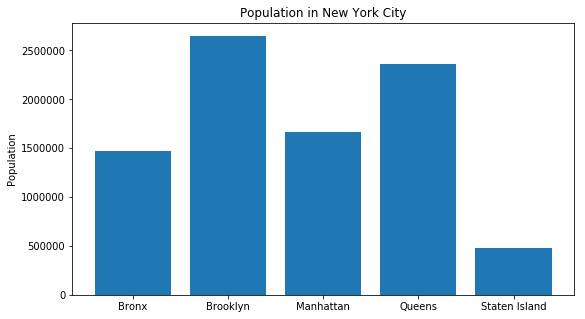

In [525]:
plt.rcParams['figure.figsize'] = (9,5)
plt.bar(df_analise['Borough'], df_analise['Population']) #Criando o gráfico
plt.title('Population in New York City') #adicionando o títuloplt.xlabel('NOME DO EIXO X')
plt.ylabel('Population')
plt.show()

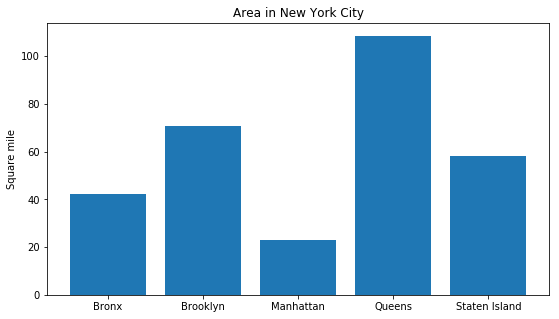

In [526]:
plt.bar(df_analise['Borough'], df_analise['Square_mi']) #Criando o gráfico
plt.title('Area in New York City') #adicionando o títuloplt.xlabel('NOME DO EIXO X')
plt.ylabel('Square mile')
plt.show()

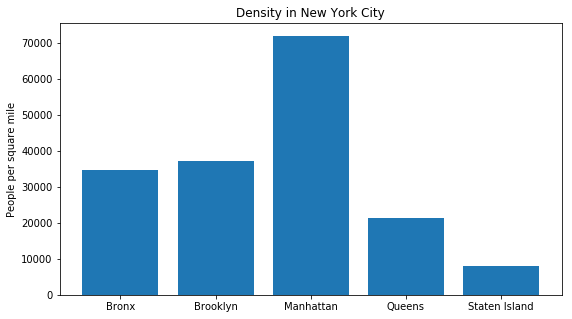

In [527]:
plt.bar(df_analise['Borough'], df_analise['Person_mi']) #Criando o gráfico
plt.title('Density in New York City') #adicionando o títuloplt.xlabel('NOME DO EIXO X')
plt.ylabel('People per square mile')
plt.show()

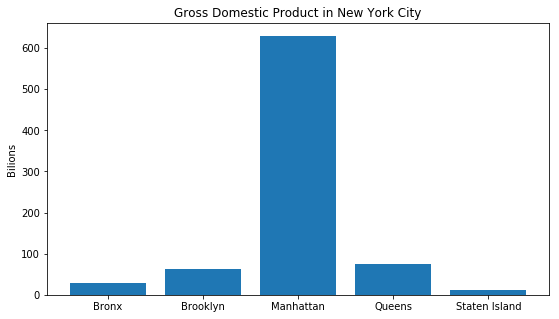

In [528]:
plt.bar(df_analise['Borough'], df_analise['Billions']) #Criando o gráfico
plt.title('Gross Domestic Product in New York City') #adicionando o títuloplt.xlabel('NOME DO EIXO X')
plt.ylabel('Bilions')
plt.show()

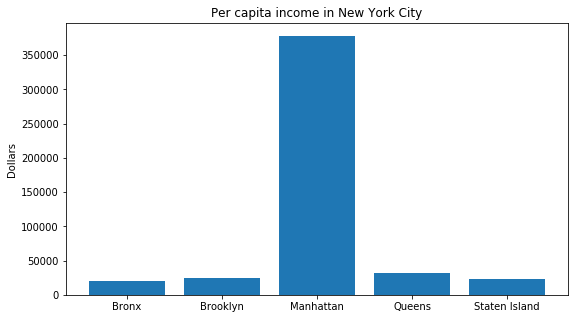

In [529]:
plt.bar(df_analise['Borough'], df_analise['Per_capita']) #Criando o gráfico
plt.title('Per capita income in New York City') #adicionando o títuloplt.xlabel('NOME DO EIXO X')
plt.ylabel('Dollars')
plt.show()

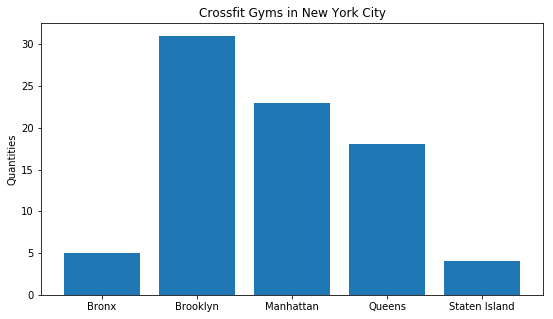

In [530]:
plt.bar(df_analise['Borough'], df_analise['Crossfits']) #Criando o gráfico
plt.title('Crossfit Gyms in New York City') #adicionando o títuloplt.xlabel('NOME DO EIXO X')
plt.ylabel('Quantities')
plt.show()

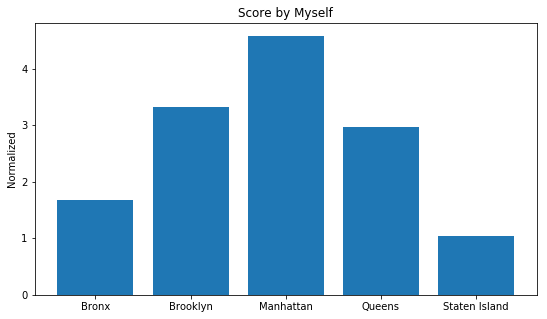

In [531]:
plt.bar(df_analise['Borough'], df_analise['Score_my']) #Criando o gráfico
plt.title('Score by Myself') #adicionando o títuloplt.xlabel('NOME DO EIXO X')
plt.ylabel('Normalized')
plt.show()

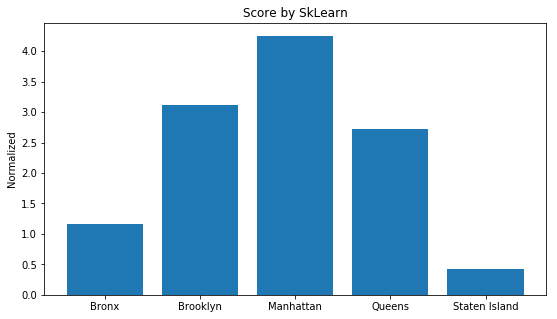

In [532]:
plt.bar(df_analise['Borough'], df_analise['Score_sk']) #Criando o gráfico
plt.title('Score by SkLearn') #adicionando o títuloplt.xlabel('NOME DO EIXO X')
plt.ylabel('Normalized')
plt.show()

# OK, MANHATAN WON BUT WHAT NEIGHBORHOOD TO CHOOSE?

### READING FILES TO USE AGAIN

In [28]:
# READING FILE
df  = pd.read_csv('analise_with_cross.csv')
# CREATING DF FROM ANALISE_WITH_CROSSFIT
df  = df.drop(columns=['Unnamed: 0'])
df.head()

Borough  B_total       Neighborhood  N_total
0     Bronx        5          Riverdale        1
1     Bronx        5     Morris Heights        1
2     Bronx        5         Mott Haven        2
3     Bronx        5  Concourse Village        1
4  Brooklyn       31          Bay Ridge        2

### SELECTING THE NEIGHBORHOODS IN MANHATTAN

In [29]:
# SELECTING MANHATTAN
df = df[df.Borough == 'Manhattan']
df_manhattan_total =df.sort_values(['N_total'],ascending=False)

In [30]:
df_manhattan_total

Borough  B_total        Neighborhood  N_total
29  Manhattan       23      Lincoln Square        4
34  Manhattan       23  Financial District        4
33  Manhattan       23             Tribeca        3
27  Manhattan       23      Central Harlem        2
36  Manhattan       23        Civic Center        2
26  Manhattan       23           Chinatown        1
28  Manhattan       23         East Harlem        1
30  Manhattan       23             Clinton        1
31  Manhattan       23         Murray Hill        1
32  Manhattan       23        East Village        1
35  Manhattan       23       Carnegie Hill        1
37  Manhattan       23       Midtown South        1
38  Manhattan       23            Flatiron        1

### CREATING A LIST WITH NEIGHBORHOODS WHERE THERE ARE CROSSFIT GYMS, TO USE NEXT

In [31]:
list_mc = list(df_manhattan_total.Neighborhood.unique())
list_mc

['Lincoln Square',
 'Financial District',
 'Tribeca',
 'Central Harlem',
 'Civic Center',
 'Chinatown',
 'East Harlem',
 'Clinton',
 'Murray Hill',
 'East Village',
 'Carnegie Hill',
 'Midtown South',
 'Flatiron']

### READING THE OFFICALS NEIGHBORHOODS AND THE RESULTS OF THE SEARCH ON FOURSQUARE

In [32]:
# READING FILES...
df1 = pd.read_csv('neighborhoods_all.csv')
df2 = pd.read_csv('neighborhoods_all_crossfit_ready.csv')

In [33]:
df1 = df1.drop(columns=['Unnamed: 0'])
df2 = df2.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [34]:
df_manhattan_neighborhoods = df1[df1.Borough=='Manhattan']
df_manhattan_crossfits = df2[df2.Borough=='Manhattan']

In [35]:
df_manhattan_total.head(2)

Borough  B_total        Neighborhood  N_total
29  Manhattan       23      Lincoln Square        4
34  Manhattan       23  Financial District        4

In [36]:
df_manhattan_neighborhoods.head(2)

Borough Neighborhood   Latitude  Longitude
6    Manhattan  Marble Hill  40.876551 -73.910660
102  Manhattan    Chinatown  40.715618 -73.994279

In [37]:
df_manhattan_crossfits.head(2)

Borough    Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
32  Manhattan       Chinatown              40.715618              -73.994279   
33  Manhattan  Central Harlem              40.815976              -73.943211   

                                     Venue  Venue Latitude  Venue Longitude  \
32                         Bowery CrossFit       40.717812       -73.992624   
33  CrossFit Harlem - Afrobrutality Sports       40.817750       -73.937753   

         Address  Distance  Postalcode       City State Venue Category  
32  285 Grand St       281     10002.0  Manhattan    NY            Gym  
33           NaN       500         NaN  Manhattan    NY            Gym

### SHOWING THE NUMBERS ...

In [38]:
# SHOWING THE NUMBER...
total_neigh = len(list_mc)
total = df_manhattan_neighborhoods.shape[0]
total_crossfit = df_manhattan_crossfits.shape[0]

# DISCOVERING WHICH PLACES THERE IS NOT CROSSFIT
df_manhattan_without = df_manhattan_neighborhoods.loc[~df_manhattan_neighborhoods.Neighborhood.isin(list_mc)]
total_w = df_manhattan_without.shape[0]
list_no_crossfit = list(df_manhattan_without.Neighborhood)
total_no_crossfit = len(list_no_crossfit)

print('\n\nPAY ATTENTION!')
print('There are {} neighborhoods in Manhattan, according the official NYC database'.format(total))
print('There are {} neighborhoods in Manhattan with Crossfit, according Foursquare'.format(total_neigh))
print('There are {} Crossfit Gyms in Neighboorhoods of Manhattan, according Foursquare.'.format(total_crossfit))
print('There are {} neighborhoods in Manhattan without Crossfit Gym, according Foursquare\n\n'.format(total_w))



PAY ATTENTION!
There are 39 neighborhoods in Manhattan, according the official NYC database
There are 13 neighborhoods in Manhattan with Crossfit, according Foursquare
There are 23 Crossfit Gyms in Neighboorhoods of Manhattan, according Foursquare.
There are 26 neighborhoods in Manhattan without Crossfit Gym, according Foursquare




### THESE NEIGHBORHOOD HAVE CROSSFIT GYMS (ACCORDING TO FOURSQUARE):  
'Lincoln Square', 'Financial District', 'Tribeca', 'Central Harlem', 'Civic Center', 'Chinatown',
'East Harlem', 'Clinton', 'Murray Hill', 'East Village', 'Carnegie Hill', 'Midtown South', 'Flatiron'

### AND THESE NEIGHBORHOOD DON'T HAVE CROSSFIT GYMS (ACCORDING TO FOURSQUARE):  
'Marble Hill','Washington Heights', 'Inwood', 'Hamilton Heights', 'Manhattanville', 'Upper East Side', 'Yorkville',
 'Lenox Hill', 'Roosevelt Island', 'Upper West Side', 'Midtown', 'Chelsea', 'Greenwich Village', 'Lower East Side',
 'Little Italy', 'Soho', 'West Village', 'Manhattan Valley', 'Morningside Heights', 'Gramercy', 'Battery Park City',
 'Noho', 'Sutton Place', 'Turtle Bay', 'Tudor City', 'Stuyvesant Town'

In [39]:
# NO CROSSFIT
df_manhattan_without.head(2)

Borough        Neighborhood   Latitude  Longitude
6    Manhattan         Marble Hill  40.876551  -73.91066
103  Manhattan  Washington Heights  40.851903  -73.93690

In [16]:
# WITH CROSSFIT
df_manhattan_crossfits.head(2)

Borough    Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
32  Manhattan       Chinatown              40.715618              -73.994279   
33  Manhattan  Central Harlem              40.815976              -73.943211   

                                     Venue  Venue Latitude  Venue Longitude  \
32                         Bowery CrossFit       40.717812       -73.992624   
33  CrossFit Harlem - Afrobrutality Sports       40.817750       -73.937753   

         Address  Distance  Postalcode       City State Venue Category  
32  285 Grand St       281     10002.0  Manhattan    NY            Gym  
33           NaN       500         NaN  Manhattan    NY            Gym

In [11]:
#save for future use
#df_manhattan_crossfit.to_csv('df_manhattan_crossfit.csv')
#df_manhattan_without.to_csv('df_manhattan_without.csv')
#df_manhattan_crossfit_places.to_csv('df_manhattan_crossfit_places.csv')

In [40]:
# reading
#df_manhattan_crossfit = pd.read_csv('df_manhattan_crossfit.csv')
#df_manhattan_without = pd.read_csv('df_manhattan_without.csv')
#df_manhattan_crossfit_places= pd.read_csv('df_manhattan_crossfit_places.csv')

In [41]:
df_manhattan_without

Borough         Neighborhood   Latitude  Longitude
6    Manhattan          Marble Hill  40.876551 -73.910660
103  Manhattan   Washington Heights  40.851903 -73.936900
104  Manhattan               Inwood  40.867684 -73.921210
105  Manhattan     Hamilton Heights  40.823604 -73.949688
106  Manhattan       Manhattanville  40.816934 -73.957385
109  Manhattan      Upper East Side  40.775639 -73.960508
110  Manhattan            Yorkville  40.775930 -73.947118
111  Manhattan           Lenox Hill  40.768113 -73.958860
112  Manhattan     Roosevelt Island  40.762404 -73.949471
113  Manhattan      Upper West Side  40.787658 -73.977059
116  Manhattan              Midtown  40.754691 -73.981669
118  Manhattan              Chelsea  40.744035 -74.003116
119  Manhattan    Greenwich Village  40.726933 -73.999914
121  Manhattan      Lower East Side  40.717807 -73.980890
123  Manhattan         Little Italy  40.719324 -73.997305
124  Manhattan                 Soho  40.722184 -74.000657
125  Manhattan         West Village  40.734434 -74.006180
126  Manhattan     Manhattan Valley  40.797307 -73.964286
127  Manhattan  Morningside Heights  40.808000 -73.963896
128  Manhattan             Gramercy  40.737210 -73.981376
129  Manhattan    Battery Park City  40.711932 -74.016869
250  Manhattan                 Noho  40.723259 -73.988434
273  Manhattan         Sutton Place  40.760280 -73.963556
275  Manhattan           Turtle Bay  40.752042 -73.967708
276  Manhattan           Tudor City  40.746917 -73.971219
277  Manhattan      Stuyvesant Town  40.731000 -73.974052

## LETS GO AND GET SOME INFORMATION ON INTERNET

### GETTING STATISTICAL DATA ON NEW YORK CITY FROM WORLDATLAS.COM

In [105]:
# GET THE PAGE
page = urllib.request.urlopen("https://www.worldatlas.com/articles/manhattan-neighborhoods-by-population.html")

# USE BEAUTIFUL SOUP
soup = BeautifulSoup(page, 'html.parser')

# THAT RETURNS A LIST.. YOU NEED TO SELECT THE FIRST TABLE [0]... THERE ARE FIVE!
table = soup.find_all('table')[0] 

# READ_HTML... THAT RETURNS A LIST... YOU NEED TO SELECT THE FIRST [0] OR YOU HAVE A PROBLEM
neighborhoods_statistics = pd.read_html(str(table))[0]

In [142]:
# FIXING PROBLEM WITH HIDDEN CHARACTERES
neighborhoods_statistics.columns = ['Rank', 'Neighborhood', 'Population']

# SHOWING THE FILE
neighborhoods_statistics.head(10)

Rank        Neighborhood  Population
0     1             Midtown      391371
1     2     Lower Manhattan      382654
2     3              Harlem      335109
3     4     Upper East Side      229688
4     5     Upper West Side      209084
5     6  Washington Heights      158318
6     7         East Harlem      115921
7     8           Chinatown      100000
8     9  Lower East Village       72957
9    10       Alphabet City       63347

### COMPARING THE WORLDATLAS DATA WITH OUR LIST OF NEIGBORHOOD WITHOUT CROSSFIT GYMS

In [143]:
df = neighborhoods_statistics.loc[neighborhoods_statistics.Neighborhood.isin(list_no_crossfit)]

In [144]:
df.head()

Rank         Neighborhood  Population
0      1              Midtown      391371
3      4      Upper East Side      229688
4      5      Upper West Side      209084
5      6   Washington Heights      158318
13    14  Morningside Heights       55929

### THIS WEBSITE SAYS THAT MIDTOWN IS THE MOST POPULOUS NEIGHBORHOOD OF MANHATTAN
BUT IS IT TRUE?

### GETTING SOME INFORAMTION ABOUT NYC ON HEALTH.NY.GOV

In [153]:
# GET THE PAGE
page = urllib.request.urlopen("https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoodpop.htm")

# USE BEAUTIFUL SOUP
soup = BeautifulSoup(page, 'html.parser')

# THAT RETURNS A LIST.. YOU NEED TO SELECT THE FIRST TABLE [0]... THERE ARE FIVE!
table = soup.find_all('table')[0] 

health = pd.read_html(str(table))[0]

In [180]:
wiki_health = health.loc[28:37]

In [181]:
wiki_health

Borough                                          region  \
28  New York (Manhattan)        Washington Heights, Inwood & Marble Hill   
29                   NaN  Hamilton Heights, Manhattanville & West Harlem   
30                   NaN                                  Central Harlem   
31                   NaN                                     East Harlem   
32                   NaN                                 Upper East Side   
33                   NaN                     Upper West Side & West Side   
34                   NaN    Chelsea, Clinton & Midtown Business District   
35                   NaN         Murray Hill, Gramercy & Stuyvesant Town   
36                   NaN                     Chinatown & Lower East Side   
37                   NaN     Battery Park City, Greenwich Village & Soho   

     Males  Females  Total Population  
28   97142   106275            203417  
29   61481    68085            129566  
30   56270    65431            121701  
31   56312    64124            120435  
32  102121   127056            229177  
33   93032   108808            201840  
34   77568    71985            149553  
35   71357    84491            155848  
36   81995    87276            169271  
37   75851    78330            154181

In [182]:
# PRINT SOME INFORMATION

print('These neighborhoods are in Midtown region:')
print(wiki_health.loc[34]['region'],',',wiki_health.loc[35]['region'] )
print('and their population is:', int(wiki_health.loc[34]['Total Population']+wiki_health.loc[35]['Total Population']))

These neighborhoods are in Midtown region:
Chelsea, Clinton & Midtown Business District , Murray Hill, Gramercy & Stuyvesant Town
and their population is: 305401


# WELL, WE HAVE ANOTHER WINNER:  MIDTOWN REGION!
Midtown is the largest commercial, media, and entertainment center in the US. The neighborhood is the most populated in Manhattan, with a population of approximately 391,371 residents

# SHOWING MAPAS WITH OUR DISCOVERIES

In [201]:
# READING NECESSARIES FILES
nyc_latlong = pd.read_csv('nyc_latlong.csv')
nyc_latlong = nyc_latlong.drop(columns=['Unnamed: 0'])

nyc_statistics = pd.read_csv('nyc_statistics.csv')
nyc_statistics = nyc_statistics.drop(columns=['Unnamed: 0'])



## NEW YORK CITY AND NEIGHBORHOODS

In [202]:
#passando o arquivo para o parametro antigo

latitude = nyc_latlong.Lat[0]
longitude = nyc_latlong.Lng[0]

neighborhoods = nyc_statistics[:]


#cores dos boroughs
cores = {'Staten Island': 'orange','Queens':'blue','Brooklyn':'indigo', 'Manhattan':'red','Bronx':'green'}


# create map of New York using latitude and longitude values obtidos na referencia acima
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

legend_html =   '''
                <div style="position: fixed; 
                            top: 20px; left: 70px; 
                            z-index:9999; font-size:34px;
                            
                              
                <h3 align="center" ><b>New York City: Boroughs</b></h3></div>
                
                ''' 

#title_html = '<h3 align="center" style="font-size:20px"><b></b></h3>'
#map_newyork.add_child(folium.Element('teste'))
map_newyork.get_root().html.add_child(folium.Element(legend_html))



# create a region map of the borough Manhattan
with open('Manhattan _poligono.txt') as data:
    polygono = json.load(data)

    folium.GeoJson(
        polygono,
        style_function=lambda feature: {
        'fillColor': cores['Manhattan'],
        'color' : cores['Manhattan'],
        'weight' : 1,
        'fillOpacity' : 0.3},
        name='geojson' ).add_to(map_newyork)

with open('Brooklyn_poligono.txt') as data:
    polygono = json.load(data)

    folium.GeoJson(
        polygono,
        style_function=lambda feature: {
        'fillColor': cores['Brooklyn'],
        'color' : cores['Brooklyn'],
        'weight' : 1,
        'fillOpacity' : 0.3},
        name='geojson' ).add_to(map_newyork)

with open('Staten Island_poligono.txt') as data:
    polygono = json.load(data)
    
    
    folium.GeoJson(
        polygono,
        style_function=lambda feature: {
        'fillColor': cores['Staten Island'],
        'color' : cores['Staten Island'],
        'weight' : 1,
        'fillOpacity' : 0.3},
        name='geojson' ).add_to(map_newyork)
    
with open('Queens_poligono.txt') as data:
    polygono = json.load(data)

    folium.GeoJson(
        polygono,
        style_function=lambda feature: {
        'fillColor': cores['Queens'],
        'color' : cores['Queens'],
        'weight' : 1,
        'fillOpacity' : 0.3},
        name='geojson' ).add_to(map_newyork)
    
with open('Bronx_poligono.txt') as data:
    polygono = json.load(data)

    folium.GeoJson(
        polygono,
        style_function=lambda feature: {
        'fillColor': cores['Bronx'],
        'color' : cores['Bronx'],
        'weight' : 1,
        'fillOpacity' : 0.3},
        name='geojson' ).add_to(map_newyork)
    
    

# add markers to map
kalo = -1
for lat, lng, borough in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough']):
#for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    
    kalo = kalo + 1
    
    cores_bairro = cores[borough.replace("'","")]
   
     
    label = '{}'.format(borough)
    #label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=cores_bairro,
        fill_opacity=0.1,
        parse_html=True).add_to(map_newyork)  
       
    folium.map.Marker(
        [lat, lng  ],
        icon=DivIcon(
        icon_size=(150,6),
        icon_anchor=(0,0),
            html='<div style="font-size: 16pt ; color:black; font-weight: bold">%s</div>' % borough,
            )
        ).add_to(map_newyork)
    


    
map_newyork

## NEW YORK CITY  - MANHATTAN

In [146]:
#passando o arquivo para o parametro antigo

latitude = nyc_latlong.Lat[0]+0.05
longitude = nyc_latlong.Lng[0]

neighborhoods = nyc_statistics[nyc_statistics.Borough=='Manhattan']


#cores dos boroughs
cores = {'Staten Island': 'orange','Queens':'blue','Brooklyn':'indigo', 'Manhattan':'red','Bronx':'green'}


# create map of New York using latitude and longitude values obtidos na referencia acima
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=11.45)

legend_html =   '''
                <div style="position: fixed; 
                            top: 20px; left: 70px; 
                            z-index:9999; font-size:34px;
                            
                              
                <h3 align="center" ><b>New York City: Manhattan</b></h3></div>
                
                ''' 

#title_html = '<h3 align="center" style="font-size:20px"><b></b></h3>'
#map_newyork.add_child(folium.Element('teste'))
map_newyork.get_root().html.add_child(folium.Element(legend_html))



# create a region map of the borough Manhattan
with open('Manhattan _poligono.txt') as data:
    polygono = json.load(data)

    folium.GeoJson(
        polygono,
        style_function=lambda feature: {
        'fillColor': cores['Manhattan'],
        'color' : cores['Manhattan'],
        'weight' : 1,
        'fillOpacity' : 0.3},
        name='geojson' ).add_to(map_newyork)

    

# add markers to map
kalo = -1
for lat, lng, borough in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough']):
#for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    
    kalo = kalo + 1
    
    cores_bairro = cores[borough.replace("'","")]
   
     
    label = '{}'.format(borough)
    #label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=cores_bairro,
        fill_opacity=0.1,
        parse_html=True).add_to(map_newyork)  
       
    folium.map.Marker(
        [lat, lng  ],
        icon=DivIcon(
        icon_size=(150,6),
        icon_anchor=(0,0),
            html='<div style="font-size: 16pt ; color:black; font-weight: bold">%s</div>' % borough,
            )
        ).add_to(map_newyork)
    


    
map_newyork

## NEW YORK CITY  - CROSSFIT GYMS

In [141]:
# MAP OF THE BOROUGHS OF NEW YORK CITY
latitude = nyc_latlong.Lat[0]+0.1
longitude = nyc_latlong.Lng[0]

#passando o arquivo para o parametro antigo
#neighborhoods = nyc_statistics[:]

#cores dos boroughs
cores = {'Staten Island': 'orange','Queens':'blue','Brooklyn':'indigo', 'Manhattan':'red','Bronx':'green'}


# create map of New York using latitude and longitude values obtidos na referencia acima
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=11.45)

legend_html =   '''
                <div style="position: fixed; 
                            top: 20px; left: 70px; 
                            z-index:9999; font-size:34px;
                            
                              
                <h3 align="center" ><b>Manhattan: Crossfits Gyms</b></h3></div>
                
                ''' 

#title_html = '<h3 align="center" style="font-size:20px"><b></b></h3>'
#map_newyork.add_child(folium.Element('teste'))
map_newyork.get_root().html.add_child(folium.Element(legend_html))

# create a region map of the borough Manhattan
with open('Manhattan _poligono.txt') as data:
    polygono = json.load(data)

    folium.GeoJson(
        polygono,
        style_function=lambda feature: {
        'fillColor': cores['Manhattan'],
        'color' : cores['Manhattan'],
        'weight' : 1,
        'fillOpacity' : 0.3},
        name='geojson' ).add_to(map_newyork)

# add markers to map
'''
for lat, lng, borough in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough']):
#for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    
    cores_bairro = cores[borough.replace("'","")]
   
    label = '{}'.format(borough)
    #label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color=cores_bairro,
        fill=True,
        fill_color=cores_bairro,
        fill_opacity=0.4,
        parse_html=True).add_to(map_newyork)  
    
    folium.map.Marker(
    [lat, lng  ],
    icon=DivIcon(
        icon_size=(150,6),
        icon_anchor=(0,0),
        html='<div style="font-size: 16pt">%s</div>' % borough,
        )
    ).add_to(map_newyork)

'''
cores = {'Staten Island': 'orange','Queens':'blue','Brooklyn':'indigo', 'Manhattan':'red','Bronx':'green'}

neighborhood = df_manhattan_crossfits[['Venue Latitude','Venue Longitude','Neighborhood','Borough','Venue']]

neighborhood.columns = ['Latitude','Longitude','Neighborhood','Borough','Venue']

for lat, lng, borough, neighborhood, venue in zip(neighborhood['Latitude'],neighborhood['Longitude'], 
                                           neighborhood['Borough'], neighborhood['Neighborhood'],neighborhood['Venue']):
    
    cores_bairro = cores[borough.replace("'","")]
    
    label = '{}, {}, {}'.format(neighborhood, borough, venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.4,
        parse_html=False).add_to(map_newyork)    

'''
neighborhood = df_manhattan_without[:]

#neighborhood.columns = ['Latitude','Longitude','Neighborhood','Borough','Venue']

for lat, lng, borough, neighborhood in zip(neighborhood['Latitude'],neighborhood['Longitude'], 
                                           neighborhood['Borough'], neighborhood['Neighborhood']):
    
    cores_bairro = cores[borough.replace("'","")]
    
    label = '{}, {}'.format(neighborhood, borough, )
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.4,
        parse_html=False).add_to(map_newyork1)        
'''

map_newyork

## NEW YORK CITY  - NEIGHBORHOODS WITHOUT CROSSFIT GYMS

In [142]:
# MAP OF THE BOROUGHS OF NEW YORK CITY
latitude = nyc_latlong.Lat[0]+0.1
longitude = nyc_latlong.Lng[0]

#passando o arquivo para o parametro antigo
#neighborhoods = nyc_statistics[:]

#cores dos boroughs
cores = {'Staten Island': 'orange','Queens':'blue','Brooklyn':'indigo', 'Manhattan':'red','Bronx':'green'}


# create map of New York using latitude and longitude values obtidos na referencia acima
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=11.45)

legend_html =   '''
                <div style="position: fixed; 
                            top: 20px; left: 70px; 
                            z-index:9999; font-size:34px;
                            
                              
                <h3 align="center" ><b>Manhattan: Neighborhoods without Crossfits Gyms</b></h3></div>
                
                ''' 

#title_html = '<h3 align="center" style="font-size:20px"><b></b></h3>'
#map_newyork.add_child(folium.Element('teste'))
map_newyork.get_root().html.add_child(folium.Element(legend_html))

# create a region map of the borough Manhattan
with open('Manhattan _poligono.txt') as data:
    polygono = json.load(data)

    folium.GeoJson(
        polygono,
        style_function=lambda feature: {
        'fillColor': cores['Manhattan'],
        'color' : cores['Manhattan'],
        'weight' : 1,
        'fillOpacity' : 0.3},
        name='geojson' ).add_to(map_newyork)

# add markers to map
'''
for lat, lng, borough in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough']):
#for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    
    cores_bairro = cores[borough.replace("'","")]
   
    label = '{}'.format(borough)
    #label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color=cores_bairro,
        fill=True,
        fill_color=cores_bairro,
        fill_opacity=0.4,
        parse_html=True).add_to(map_newyork)  
    
    folium.map.Marker(
    [lat, lng  ],
    icon=DivIcon(
        icon_size=(150,6),
        icon_anchor=(0,0),
        html='<div style="font-size: 16pt">%s</div>' % borough,
        )
    ).add_to(map_newyork)

'''
cores = {'Staten Island': 'orange','Queens':'blue','Brooklyn':'indigo', 'Manhattan':'red','Bronx':'green'}
'''
neighborhood = df_manhattan_crossfits[['Venue Latitude','Venue Longitude','Neighborhood','Borough','Venue']]

neighborhood.columns = ['Latitude','Longitude','Neighborhood','Borough','Venue']

for lat, lng, borough, neighborhood, venue in zip(neighborhood['Latitude'],neighborhood['Longitude'], 
                                           neighborhood['Borough'], neighborhood['Neighborhood'],neighborhood['Venue']):
    
    cores_bairro = cores[borough.replace("'","")]
    
    label = '{}, {}, {}'.format(neighborhood, borough, venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.4,
        parse_html=False).add_to(map_newyork)    
'''

neighborhood = df_manhattan_without[:]

#neighborhood.columns = ['Latitude','Longitude','Neighborhood','Borough','Venue']

for lat, lng, borough, neighborhood in zip(neighborhood['Latitude'],neighborhood['Longitude'], 
                                           neighborhood['Borough'], neighborhood['Neighborhood']):
    
    cores_bairro = cores[borough.replace("'","")]
    
    label = '{}, {}'.format(neighborhood, borough, )
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.4,
        parse_html=False).add_to(map_newyork)        


map_newyork

## NEW YORK CITY  - COMPARING NEIGHBORHOODS WITH ANF WITHOUT

In [203]:
# MAP OF THE BOROUGHS OF NEW YORK CITY
latitude = nyc_latlong.Lat[0]+0.1
longitude = nyc_latlong.Lng[0]

#passando o arquivo para o parametro antigo
#neighborhoods = nyc_statistics[:]

#cores dos boroughs
cores = {'Staten Island': 'orange','Queens':'blue','Brooklyn':'indigo', 'Manhattan':'red','Bronx':'green'}


# create map of New York using latitude and longitude values obtidos na referencia acima
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=11.45)

legend_html =   '''
                <div style="position: fixed; 
                            top: 20px; left: 70px; 
                            z-index:9999; font-size:34px;
                            
                              
                <h3 align="center" ><b>Manhattan: Possible Neighborhoods </b></h3></div>
                
                ''' 

#title_html = '<h3 align="center" style="font-size:20px"><b></b></h3>'
#map_newyork.add_child(folium.Element('teste'))
map_newyork.get_root().html.add_child(folium.Element(legend_html))

# create a region map of the borough Manhattan
with open('Manhattan _poligono.txt') as data:
    polygono = json.load(data)

    folium.GeoJson(
        polygono,
        style_function=lambda feature: {
        'fillColor': cores['Manhattan'],
        'color' : cores['Manhattan'],
        'weight' : 1,
        'fillOpacity' : 0.3},
        name='geojson' ).add_to(map_newyork)

# add markers to map
'''
for lat, lng, borough in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough']):
#for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    
    cores_bairro = cores[borough.replace("'","")]
   
    label = '{}'.format(borough)
    #label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color=cores_bairro,
        fill=True,
        fill_color=cores_bairro,
        fill_opacity=0.4,
        parse_html=True).add_to(map_newyork)  
    
    folium.map.Marker(
    [lat, lng  ],
    icon=DivIcon(
        icon_size=(150,6),
        icon_anchor=(0,0),
        html='<div style="font-size: 16pt">%s</div>' % borough,
        )
    ).add_to(map_newyork)

'''
cores = {'Staten Island': 'orange','Queens':'blue','Brooklyn':'indigo', 'Manhattan':'red','Bronx':'green'}

neighborhood = df_manhattan_crossfits[['Venue Latitude','Venue Longitude','Neighborhood','Borough','Venue']]

neighborhood.columns = ['Latitude','Longitude','Neighborhood','Borough','Venue']

for lat, lng, borough, neighborhood, venue in zip(neighborhood['Latitude'],neighborhood['Longitude'], 
                                           neighborhood['Borough'], neighborhood['Neighborhood'],neighborhood['Venue']):
    
    cores_bairro = cores[borough.replace("'","")]
    
    label = '{}, {}, {}'.format(neighborhood, borough, venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.4,
        parse_html=False).add_to(map_newyork)    


neighborhood = df_manhattan_without[:]

#neighborhood.columns = ['Latitude','Longitude','Neighborhood','Borough','Venue']

for lat, lng, borough, neighborhood in zip(neighborhood['Latitude'],neighborhood['Longitude'], 
                                           neighborhood['Borough'], neighborhood['Neighborhood']):
    
    cores_bairro = cores[borough.replace("'","")]
    
    label = '{}, {}'.format(neighborhood, borough, )
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.4,
        parse_html=False).add_to(map_newyork)        


map_newyork

## NEW YORK CITY  - THE WINNER - MIDTOWN

In [206]:
# MAP OF THE BOROUGHS OF NEW YORK CITY
latitude = nyc_latlong.Lat[0]+0.1
longitude = nyc_latlong.Lng[0]

#passando o arquivo para o parametro antigo
#neighborhoods = nyc_statistics[:]

#cores dos boroughs
cores = {'Staten Island': 'orange','Queens':'blue','Brooklyn':'indigo', 'Manhattan':'red','Bronx':'green'}


# create map of New York using latitude and longitude values obtidos na referencia acima
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=11.45)

legend_html =   '''
                <div style="position: fixed; 
                            top: 20px; left: 70px; 
                            z-index:9999; font-size:34px;
                            
                              
                <h3 align="center" ><b>The Winner Neighborhood: Midtown</b></h3></div>
                
                ''' 

#title_html = '<h3 align="center" style="font-size:20px"><b></b></h3>'
#map_newyork.add_child(folium.Element('teste'))
map_newyork.get_root().html.add_child(folium.Element(legend_html))

# create a region map of the borough Manhattan
with open('Manhattan _poligono.txt') as data:
    polygono = json.load(data)

    folium.GeoJson(
        polygono,
        style_function=lambda feature: {
        'fillColor': cores['Manhattan'],
        'color' : cores['Manhattan'],
        'weight' : 1,
        'fillOpacity' : 0.3},
        name='geojson' ).add_to(map_newyork)

# add markers to map
'''
for lat, lng, borough in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough']):
#for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    
    cores_bairro = cores[borough.replace("'","")]
   
    label = '{}'.format(borough)
    #label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color=cores_bairro,
        fill=True,
        fill_color=cores_bairro,
        fill_opacity=0.4,
        parse_html=True).add_to(map_newyork)  
    
    folium.map.Marker(
    [lat, lng  ],
    icon=DivIcon(
        icon_size=(150,6),
        icon_anchor=(0,0),
        html='<div style="font-size: 16pt">%s</div>' % borough,
        )
    ).add_to(map_newyork)

'''

cores = {'Staten Island': 'orange','Queens':'blue','Brooklyn':'indigo', 'Manhattan':'red','Bronx':'green'}

'''
neighborhood = df_manhattan_crossfits[['Venue Latitude','Venue Longitude','Neighborhood','Borough','Venue']]

neighborhood.columns = ['Latitude','Longitude','Neighborhood','Borough','Venue']

for lat, lng, borough, neighborhood, venue in zip(neighborhood['Latitude'],neighborhood['Longitude'], 
                                           neighborhood['Borough'], neighborhood['Neighborhood'],neighborhood['Venue']):
    
    cores_bairro = cores[borough.replace("'","")]
    
    label = '{}, {}, {}'.format(neighborhood, borough, venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.4,
        parse_html=False).add_to(map_newyork)    
'''

neighborhood = df_manhattan_without[:]
neighborhood = neighborhood[neighborhood.Neighborhood=='Midtown']

#neighborhood.columns = ['Latitude','Longitude','Neighborhood','Borough','Venue']

for lat, lng, borough, neighborhood in zip(neighborhood['Latitude'],neighborhood['Longitude'], 
                                           neighborhood['Borough'], neighborhood['Neighborhood']):
    
    cores_bairro = cores[borough.replace("'","")]
    
    label = '{}, {}'.format(neighborhood, borough, )
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.4,
        parse_html=False).add_to(map_newyork)   
    
    folium.map.Marker(
       [lat, lng  ],
       icon=DivIcon(
       icon_size=(300,6),
       icon_anchor=(0,0),
       html='<div style="font-size: 16pt ; color:black; font-weight: bold">%s</div>' % neighborhood,
            )
        ).add_to(map_newyork)


map_newyork